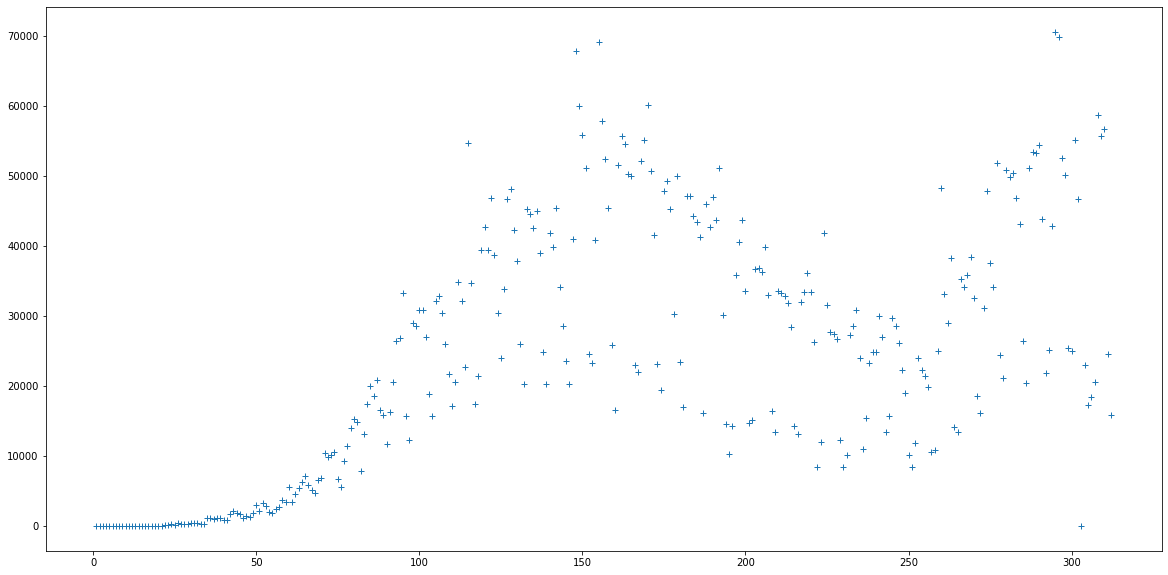

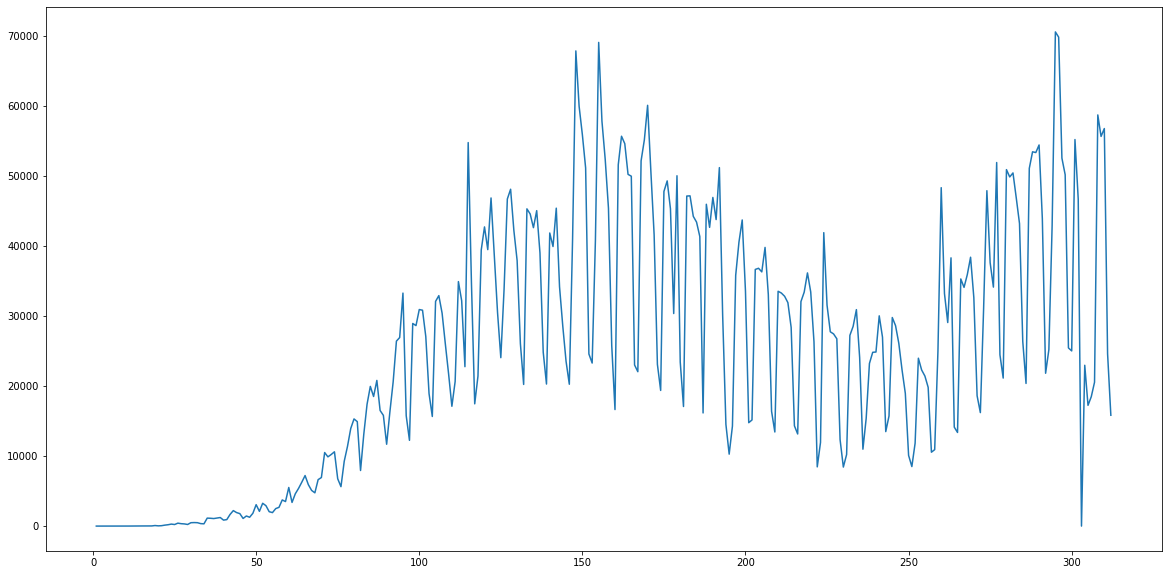

In [430]:
#CASOS DE COVID-19

import pandas
import random
import numpy as np
import statistics
import matplotlib.pyplot as plt

#define labels
colnames = ['dias', 'casos']

#import CSV file
data = pandas.read_csv('/content/drive/MyDrive/Colab Notebooks/covid19_second_wave/new_cases_brasil.csv', names=colnames, delimiter=';')

#append the data to pyhton lists
dias = data.dias.tolist()
casos = data.casos.tolist()

#Remover strings do cabeçalho das listas
del dias[0]
del casos[0]

#converter os caracteres dos casos para números
casos = list(map(int, casos))

new_dias=[]

#Criar uma lista com os dias epidemiológicos
dia_inicial=1
for i in range(len(dias)):
    new_dias.append(dia_inicial)
    dia_inicial+=1

#make some graphs
#plt.plot(semana_epidemiologica, casos_2019, '')
plt.figure(figsize=(20,10))
plt.plot(new_dias, casos, '+')

'''
plt.grid(True)

plt.legend(['Casos COVID-19 registrados'], loc=1)
plt.ylabel('Óbitos por SRAG')
plt.xlabel('Semana Epidemiológica')
plt.suptitle('Óbitos por SRAG por Semana Epidemiológica no Brasil')
'''

plt.show()

plt.figure(figsize=(20,10))
plt.plot(new_dias, casos, '-')

plt.show()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


Iteração: 50


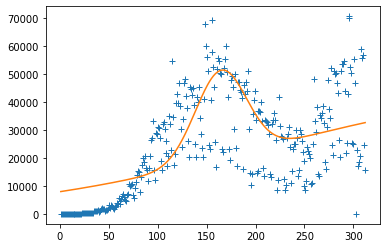

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


Iteração: 100


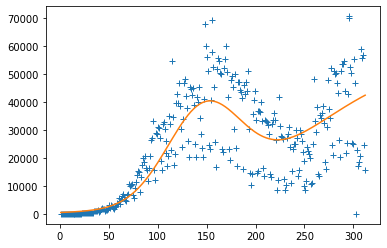

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


Iteração: 150


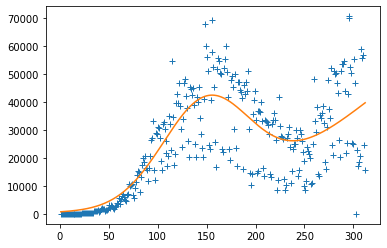

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


Iteração: 200


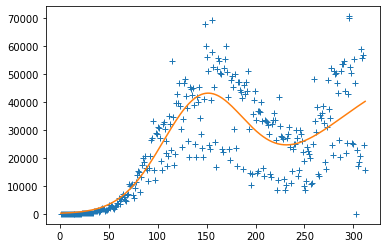

Iteração: 250


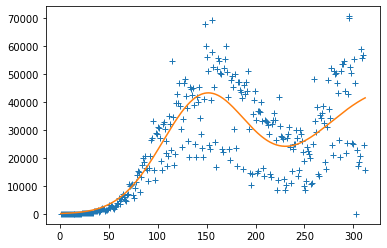

Iteração: 300


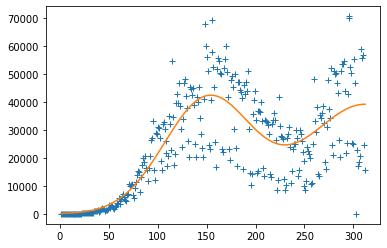

Iteração: 350


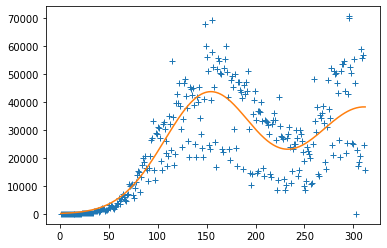

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


Iteração: 400


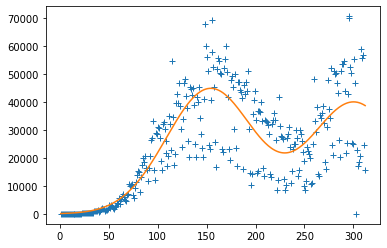

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


Iteração: 450


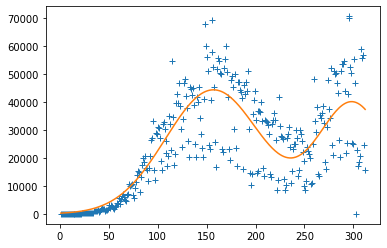

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


Iteração: 500


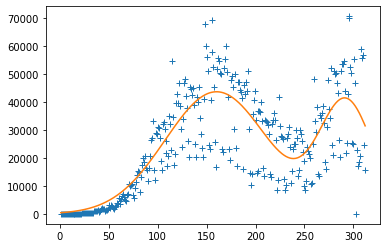

Iteração: 550


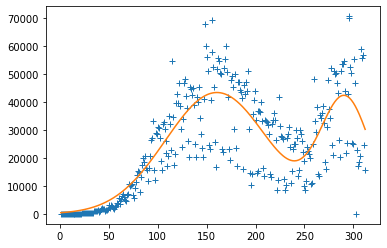

Iteração: 600


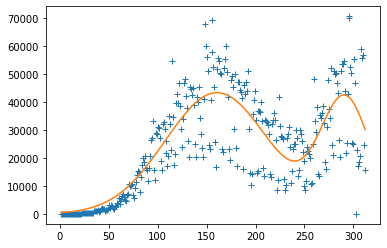

Iteração: 650


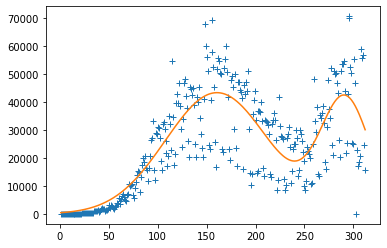

Iteração: 700


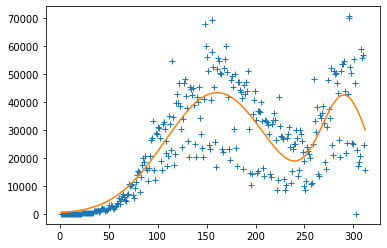

Iteração: 750


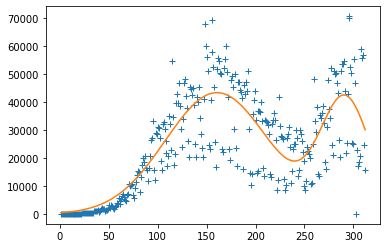

Iteração: 800


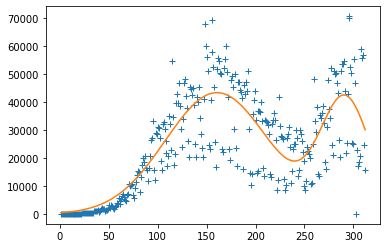

Iteração: 850


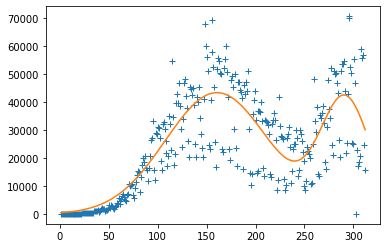

Iteração: 900


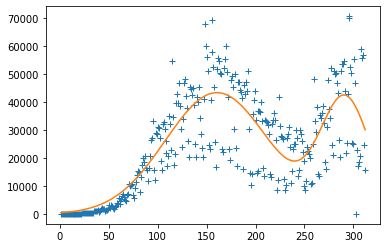

Iteração: 950


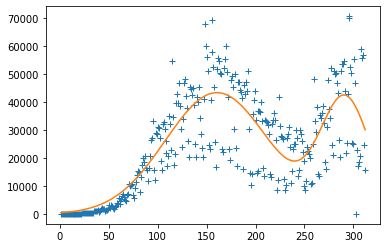

Iteração: 1000


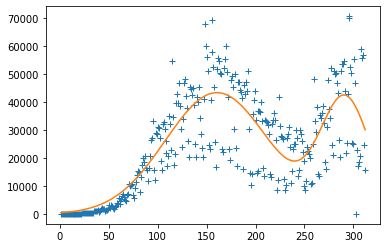

[43294.194232608344, 160.56499554329753, 52.668299492361996, 40446.50930742306, 291.76136913391144, 25.295975897733946]


<Figure size 432x288 with 0 Axes>

In [431]:
#EVOLUÇÃO DIFERENCIAL:

#--- Equações do modelo a ser estudado ---#
def polinomio(x_dados, w):
    return w[0]+w[1]*x_dados+w[2]*x_dados**2+w[3]*x_dados**3+w[4]*x_dados**4+w[5]*x_dados**5

def single_gaussian(x_dados, w):
    return w[0]*np.exp(-(x_dados-w[1])**2/(2*(w[2]**2)))

def double_gaussian(x_dados, w):
    return w[0]*np.exp(-((x_dados-w[1])**2)/(2*(w[2]**2)))+w[3]*np.exp(-((x_dados-w[4])**2)/(2*(w[5]**2)))

#--- Função para plotar ---#
def grafico(x, y, yfit):
    plt.plot(x, y, '+')
    plt.plot(x, yfit)
    plt.show()
    #plt.pause(0.1)
    plt.clf()

#--- Função a ser minimizada pelo método ---# 
def rsme_sin(x_dados, y_dados, w): #rsme para o teste com seno
    y_pred = double_gaussian(x_dados, w)
    return np.sqrt(sum((y_dados-y_pred)**2)/len(y_dados))

#--- Outras Funções ---#

#Função para garantir que novos indivíduos estejam dentro do range estabelecido
def ensure_bounds(vec, bounds):
    vec_new = [] 
    for i in range(len(vec)):
        if vec[i] < bounds[i][0]:
            vec_new.append(bounds[i][0])
        if vec[i] > bounds[i][1]:
            vec_new.append(bounds[i][1])
        if bounds[i][0] <= vec[i] <= bounds[i][1]:
            vec_new.append(vec[i])
    return vec_new

#--- Função DE ---#

def Differential_Evolution(cost_func, bounds, popsize, mutate, recombination, maxiter, x_dados, y_dados):

    #--- Inicializar população ---#
    
    #Cria indivíduos para a população com parâmetros dentro do range estabelecido
    population = []
    for i in range(0,popsize):
        indv = []
        for j in range(len(bounds)):
            indv.append(random.uniform(bounds[j][0],bounds[j][1]))
        population.append(indv)
            
    #--- "Treinar" ---#

    #Para o número de iterações escolhido...:
    for i in range(1, maxiter+1):
        #print ("Iteração:",i)
        gen_scores = []
        #Para todos os indivíduos na população...:
        for j in range(0, popsize):

            #--- Mutação ---#
            
            #Fixa o indivíduo na posição [j] e escolhe outros 3 randomicamente
            candidates = list(range(0,popsize))
            candidates.remove(j)
            random_index = random.sample(candidates, 3)

            x_1 = population[random_index[0]]
            x_2 = population[random_index[1]]
            x_3 = population[random_index[2]]
            x_t = population[j]                #Indivíduo fixado
            
            #Algorítimo de mutação: (mais simples)
            #subtract x_3 from x_2, and create a new vector x_diff
            x_diff = [x_2_i - x_3_i for x_2_i, x_3_i in zip(x_2, x_3)]
            # multiply x_diff by the mutation factor (F) and add to x_1
            v_donor = [x_1_i + mutate * x_diff_i for x_1_i, x_diff_i in zip(x_1, x_diff)]
            v_donor = ensure_bounds(v_donor, bounds)

            #--- "Crossover" ---#

            #Algorítmo que determina se a recombinação acontece ou não, baseado no fator de 
            #recombinação. Se for o caso, gera um novo indivíduo potencialmente melhor que 
            #o fixado [j]
            v_trial = []
            for k in range(len(x_t)):
                crossover = random.random()
                if crossover <= recombination:
                    v_trial.append(v_donor[k])
                else:
                    v_trial.append(x_t[k])
                    
            #--- Seleção ---"

            #Obtem "scores" para o indivíduo fixado e o novo indivíduo
            score_trial  = cost_func(x_dados, y_dados, v_trial)
            score_target = cost_func(x_dados, y_dados, x_t)
            
            #Avalia se o novo é melhor, se sim, substitui o antigo(fixado [j])
            if score_trial < score_target:
                population[j] = v_trial
                gen_scores.append(score_trial)
                #print( '   >',score_trial, v_trial)
            else:
                #print( '   >',score_target, x_t)
                gen_scores.append(score_target)

        #--- Analizar solução/salva-las ---#

        #gen_avg = sum(gen_scores) / popsize #média da geração
        #gen_best = min(gen_scores) #melhor da geração
        gen_sol = population[gen_scores.index(min(gen_scores))] #melhor resultado
        
        #plotar gráfico
        if (i%50.0==0):
            print('Iteração:', i)
            yfit = double_gaussian(x_dados, gen_sol)
            grafico(x_dados, y_dados, yfit)
        
    return gen_sol

#--- Parâmetros do DE ---#

#load data:
data    = np.loadtxt('/content/drive/MyDrive/Colab Notebooks/covid19_second_wave/sin_dados.txt')
x_dados = np.array(new_dias)
y_dados = np.array(casos)

#função a ser minimizada
cost_func = rsme_sin

#range dos parametros do modelo
#leg: w[0]->height of the peak, w[1]->center position, w[2]->standard deviations
bounds = [(0,1e6), (125,175), (0,1000), (0,1e6), (175,600), (0,1000)]

#Outros parâmetros
popsize = 60              #Tamanho da população (Artigo 10*n_parâmetros_do_modelo)
mutate = 0.6              #Fator de mutação [0,2]
recombination = 0.5       #Parâmetro de recombinação [0,1]
maxiter = 1000            #Número de gerações

#MAIN:
print(Differential_Evolution(cost_func, bounds, popsize, mutate, recombination, maxiter, x_dados, y_dados))


In [432]:
#VALORES DE 10 RUNS (CASOS COVID-19)

tmp1=[43294.19445205458, 160.56499571098388, 52.66829919027741, 40446.50891440105, 291.7613697825597, 25.295976522380656]
tmp2=[37259.80646219353, 148.7122033712035, 43.311304756186345, 181317.52961277886, 601.2263393846357, 172.1510659097681]
tmp3=[37883.78386776109, 147.9876465237227, 42.90613445950184, 83971.06546431824, 465.74630089001096, 134.2285532399934]
tmp4=[37043.32232075123, 148.6026027509776, 42.66404891935485, 193133.39067605697, 621.4559836775248, 180.11520061039226]
tmp5=[37984.71708364435, 148.76445674445418, 43.3520303159617, 108395.43925118854, 505.8963221235179, 144.73583746608364]
tmp6=[37424.72432853233, 148.6486847677336, 43.08361210892376, 117300.93396281573, 526.9832817343711, 153.45746489793112]
tmp7=[40814.08711804191, 175.0, 61.68364486148347, 38004.73615217664, 292.8767939111892, 18.74348005011365]
tmp8=[38260.893898573835, 148.44192841880127, 43.6826101166863, 78291.4417970891, 450.72925749761964, 127.67016402891593]
tmp9=[37189.922188083714, 148.6712252209058, 42.95858767376877, 181040.73826508128, 604.7888068170819, 174.82469031813503]
tmp10=[37393.79693397315, 149.37620597824755, 43.22921860934987, 229016.24828793795, 642.32431950714, 182.58612312026497]
tmp11=[43294.19433170204, 160.56499519691863, 52.6682991117429, 40446.50900953464, 291.7613692006441, 25.295976175662894]
tmp12=[43294.19447831973, 160.5649955899557, 52.66829922227354, 40446.509486627285, 291.7613692109254, 25.295975949372313]
tmp13=[43294.194335884335, 160.56499585300304, 52.668299176309084, 40446.50973908974, 291.7613695742252, 25.29597597282611]
tmp14=[43294.194272759625, 160.56499568013552, 52.668299275339784, 40446.50976687562, 291.76136899628625, 25.295975619825924]
tmp15=[43294.19428190229, 160.5649955290006, 52.66829898306517, 40446.509301008824, 291.76136947521087, 25.295976265464166]
tmp16=[43294.19422742818, 160.56499589401653, 52.66829912700615, 40446.50922494511, 291.7613693004918, 25.29597569946591]
tmp17=[43294.194317587506, 160.56499550190014, 52.66829878811861, 40446.50951149769, 291.76136905657444, 25.29597638578864]
tmp18=[43294.194409372474, 160.5649950900288, 52.66829926227435, 40446.50928486604, 291.7613692717486, 25.29597586972693]
tmp19=[43294.194461664476, 160.56499509993017, 52.668298692961265, 40446.50906348998, 291.76136960669237, 25.295977158306265]
tmp20=[43294.194866722595, 160.56499540553486, 52.66829886071428, 40446.50950686819, 291.7613699101224, 25.29597622640362]

media=[]

for i in range(len(tmp1)):
    tmp=[tmp1[i], tmp2[i], tmp3[i], tmp4[i], tmp5[i], tmp6[i], tmp7[i], tmp8[i], tmp9[i], tmp10[i], tmp11[i], tmp12[i], tmp13[i], tmp14[i], tmp15[i], tmp16[i], tmp17[i], tmp18[i], tmp19[i], tmp20[i]]
    media.append(statistics.mean(tmp))

print(media)


[40874.559631847646, 156.5209952163727, 49.311124075564976, 82769.15631393237, 396.0701234464286, 78.33841587434108]


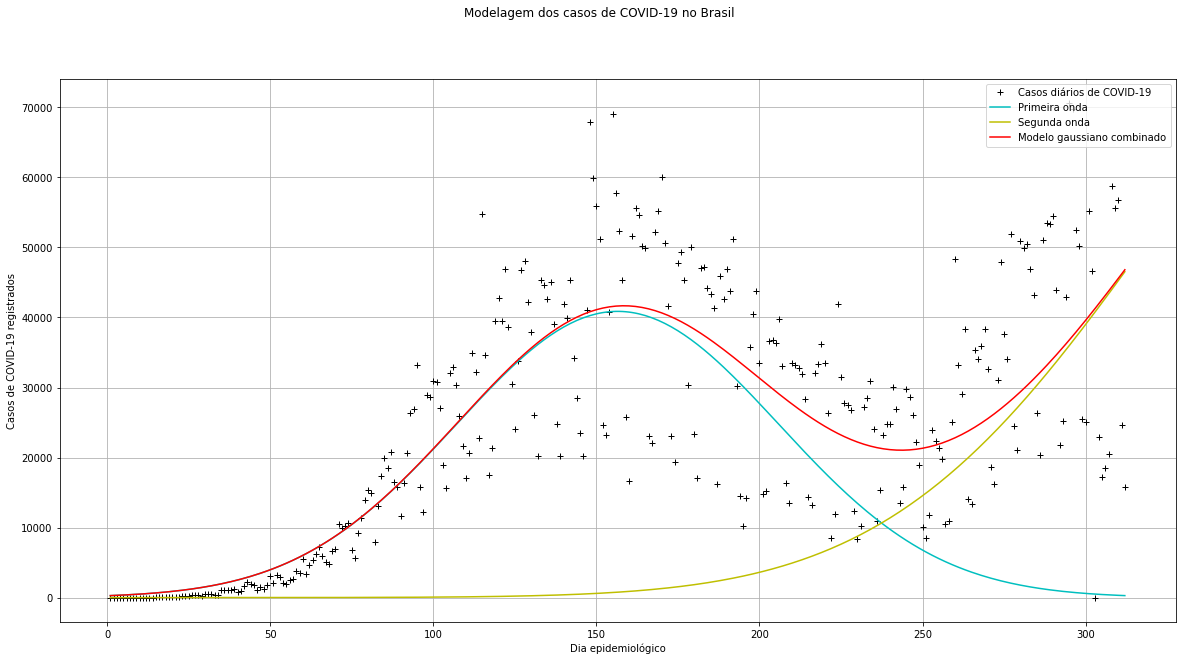

In [433]:
#GRAFICOS (CASOS COVID-19)

plt.figure(figsize=(20,10))
plt.grid(True)
#plt.legend(['Casos COVID-19 registrados'], loc=1)
plt.ylabel('Casos de COVID-19 registrados')
plt.xlabel('Dia epidemiológico')
plt.suptitle('Modelagem dos casos de COVID-19 no Brasil')

plt.plot(new_dias, casos, 'k+')
plt.plot(new_dias, media[0]*np.exp(-((x_dados-media[1])**2)/(2*(media[2]**2))), 'c')
plt.plot(new_dias, media[3]*np.exp(-((x_dados-media[4])**2)/(2*(media[5]**2))), 'y')
plt.plot(new_dias, media[0]*np.exp(-((x_dados-media[1])**2)/(2*(media[2]**2)))+media[3]*np.exp(-((x_dados-media[4])**2)/(2*(media[5]**2))), 'r')

plt.legend(['Casos diários de COVID-19', 'Primeira onda', 'Segunda onda', 'Modelo gaussiano combinado'], loc=1)

plt.show()


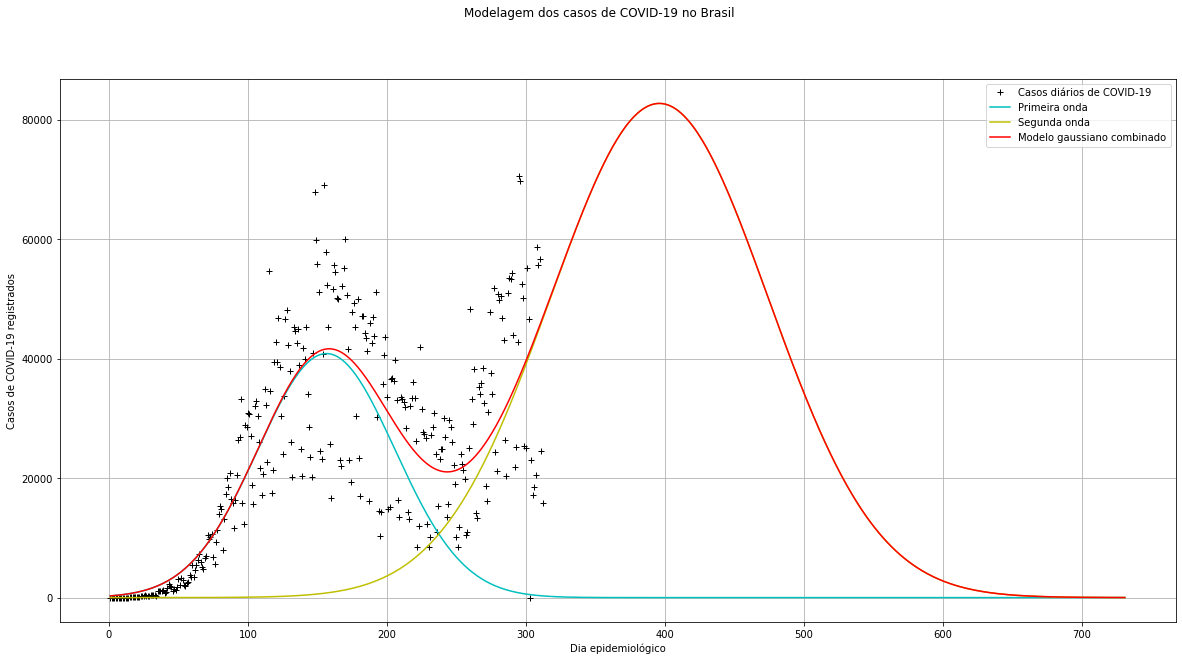

In [434]:
#GRAFICOS (CASOS COVID-19)

plt.figure(figsize=(20,10))
plt.grid(True)
#plt.legend(['Casos COVID-19 registrados'], loc=1)
plt.ylabel('Casos de COVID-19 registrados')
plt.xlabel('Dia epidemiológico')
plt.suptitle('Modelagem dos casos de COVID-19 no Brasil')

future_dias=[]
dia_inicial=1
for i in range(731):
    future_dias.append(dia_inicial)
    dia_inicial+=1

plt.plot(new_dias, casos, 'k+')
plt.plot(future_dias, media[0]*np.exp(-((np.array(future_dias)-media[1])**2)/(2*(media[2]**2))), 'c')
plt.plot(future_dias, media[3]*np.exp(-((np.array(future_dias)-media[4])**2)/(2*(media[5]**2))), 'y')
plt.plot(future_dias, media[0]*np.exp(-((np.array(future_dias)-media[1])**2)/(2*(media[2]**2)))+media[3]*np.exp(-((np.array(future_dias)-media[4])**2)/(2*(media[5]**2))), 'r')

plt.legend(['Casos diários de COVID-19', 'Primeira onda', 'Segunda onda', 'Modelo gaussiano combinado'], loc=1)


plt.show()


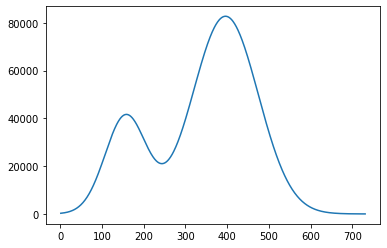

In [435]:
#ARMAZENAR PONTOS PARA FAZER NORMALIZAÇÃO:

gaussianas_backup01 = []  

for i in range(len(future_dias)):
    gaussianas_backup01.append(media[0]*np.exp(-((future_dias[i]-media[1])**2)/(2*(media[2]**2)))+media[3]*np.exp(-((future_dias[i]-media[4])**2)/(2*(media[5]**2))))

plt.plot(future_dias, gaussianas_backup01)
plt.show()


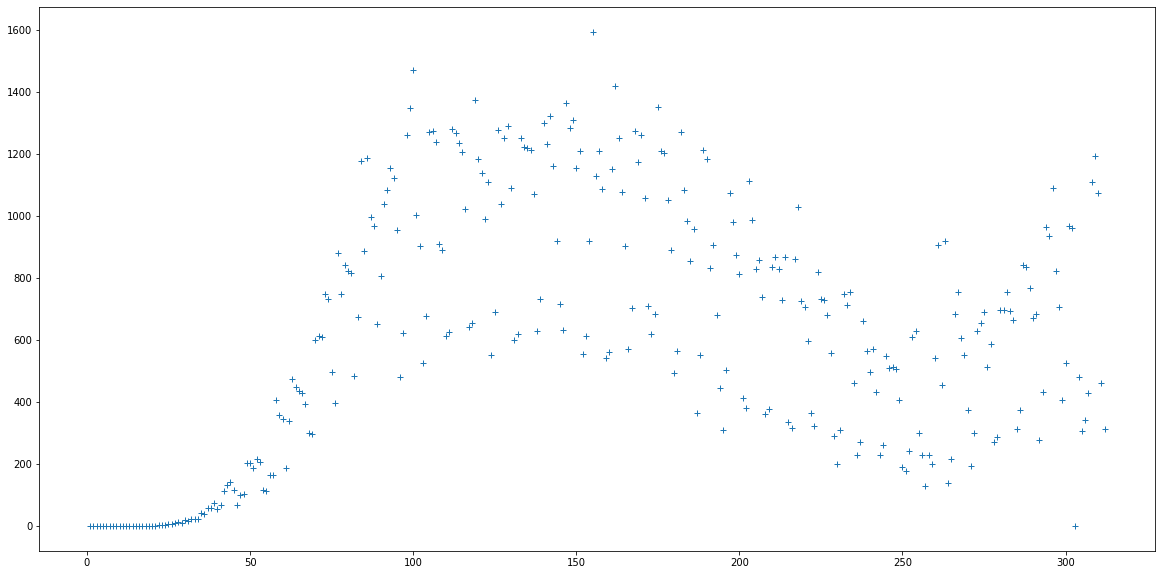

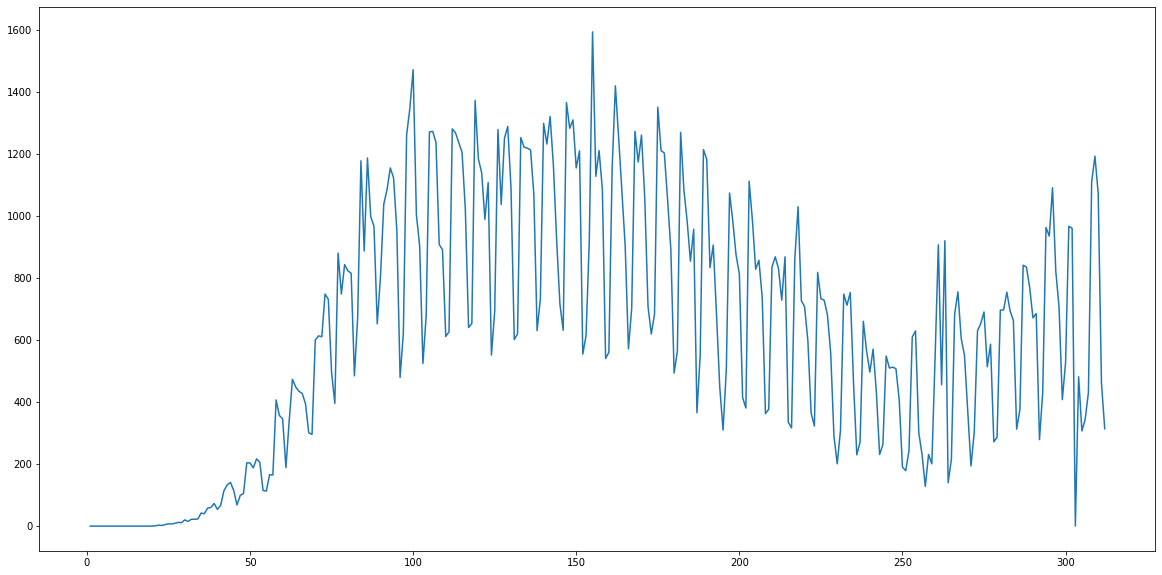

In [436]:
#MORTES POR COVID-19

import pandas
import random
import numpy as np
import matplotlib.pyplot as plt
import statistics

#define labels
colnames = ['dias', 'casos']

#import CSV file
data = pandas.read_csv('/content/drive/MyDrive/Colab Notebooks/covid19_second_wave/new_deaths_brasil.csv', names=colnames, delimiter=';')

#append the data to pyhton lists
dias = data.dias.tolist()
casos = data.casos.tolist()

#Remover strings do cabeçalho das listas
del dias[0]
del casos[0]

#converter os caracteres dos casos para números
casos = list(map(int, casos))

new_dias=[]

#Criar uma lista com os dias epidemiológicos
dia_inicial=1
for i in range(len(dias)):
    new_dias.append(dia_inicial)
    dia_inicial+=1

#make some graphs
#plt.plot(semana_epidemiologica, casos_2019, '')
plt.figure(figsize=(20,10))
plt.plot(new_dias, casos, '+')

plt.show()

plt.figure(figsize=(20,10))
plt.plot(new_dias, casos, '-')

plt.show()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


Iteração: 50


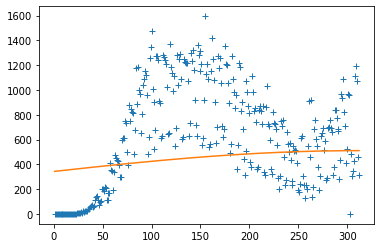

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


Iteração: 100


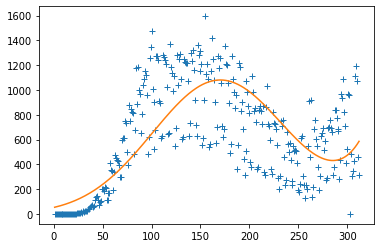

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


Iteração: 150


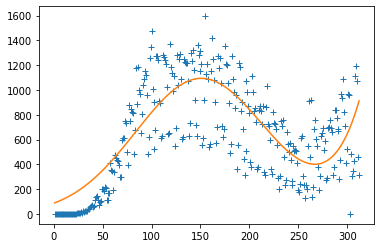

Iteração: 200


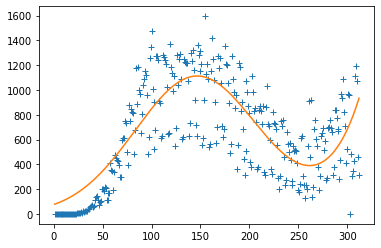

Iteração: 250


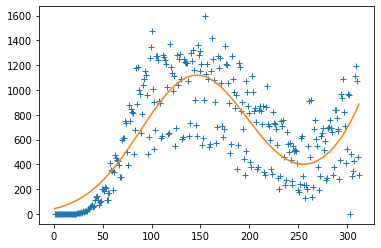

Iteração: 300


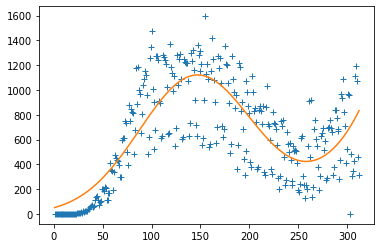

Iteração: 350


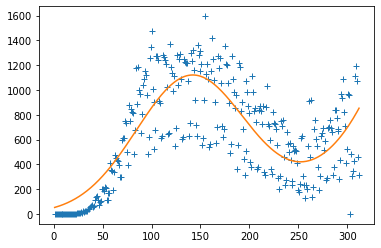

Iteração: 400


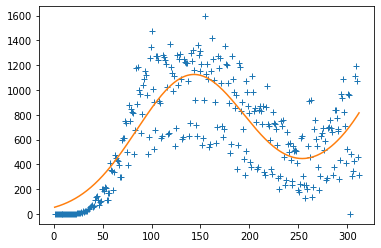

Iteração: 450


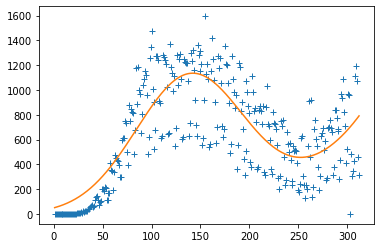

Iteração: 500


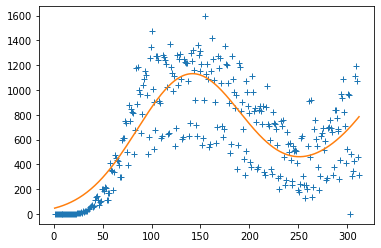

Iteração: 550


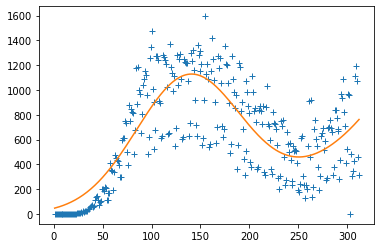

Iteração: 600


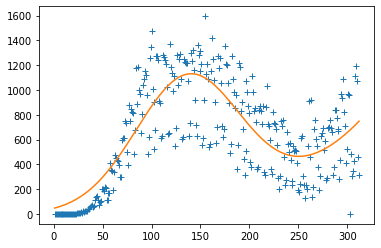

Iteração: 650


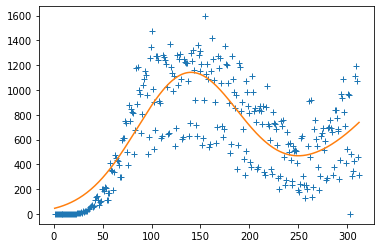

Iteração: 700


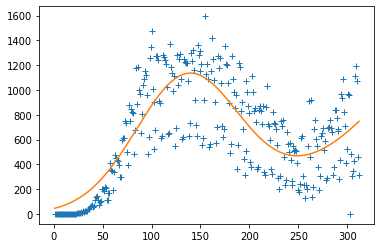

Iteração: 750


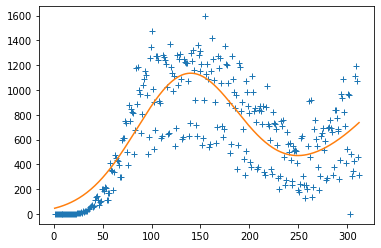

Iteração: 800


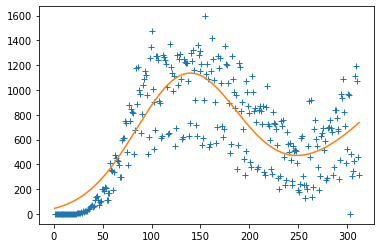

Iteração: 850


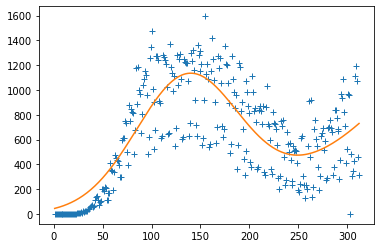

Iteração: 900


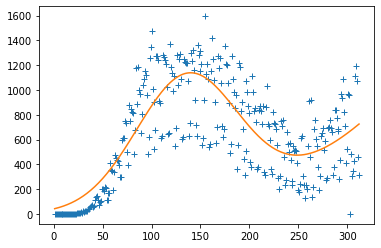

Iteração: 950


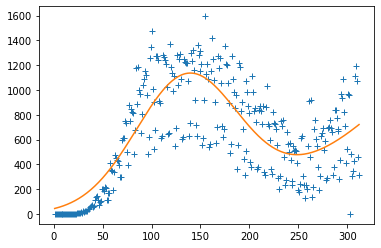

Iteração: 1000


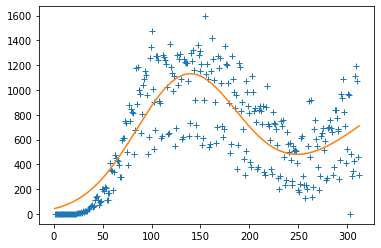

[1053.129124649766, 136.1550589020867, 52.509390725674194, 1505.867203110755, 490.0422619605746, 144.69986006293965]


<Figure size 432x288 with 0 Axes>

In [437]:
#EVOLUÇÃO DIFERENCIAL:

#--- Equações do modelo a ser estudado ---#
def polinomio(x_dados, w):
    return w[0]+w[1]*x_dados+w[2]*x_dados**2+w[3]*x_dados**3+w[4]*x_dados**4+w[5]*x_dados**5

def single_gaussian(x_dados, w):
    return w[0]*np.exp(-(x_dados-w[1])**2/(2*(w[2]**2)))

def double_gaussian(x_dados, w):
    return w[0]*np.exp(-((x_dados-w[1])**2)/(2*(w[2]**2)))+w[3]*np.exp(-((x_dados-w[4])**2)/(2*(w[5]**2)))

#--- Função para plotar ---#
def grafico(x, y, yfit):
    plt.plot(x, y, '+')
    plt.plot(x, yfit)
    plt.show()
    #plt.pause(0.1)
    plt.clf()

#--- Função a ser minimizada pelo método ---# 
def rsme_sin(x_dados, y_dados, w): #rsme para o teste com seno
    y_pred = double_gaussian(x_dados, w)
    return np.sqrt(sum((y_dados-y_pred)**2)/len(y_dados))

#--- Outras Funções ---#

#Função para garantir que novos indivíduos estejam dentro do range estabelecido
def ensure_bounds(vec, bounds):
    vec_new = [] 
    for i in range(len(vec)):
        if vec[i] < bounds[i][0]:
            vec_new.append(bounds[i][0])
        if vec[i] > bounds[i][1]:
            vec_new.append(bounds[i][1])
        if bounds[i][0] <= vec[i] <= bounds[i][1]:
            vec_new.append(vec[i])
    return vec_new

#--- Função DE ---#

def Differential_Evolution(cost_func, bounds, popsize, mutate, recombination, maxiter, x_dados, y_dados):

    #--- Inicializar população ---#
    
    #Cria indivíduos para a população com parâmetros dentro do range estabelecido
    population = []
    for i in range(0,popsize):
        indv = []
        for j in range(len(bounds)):
            indv.append(random.uniform(bounds[j][0],bounds[j][1]))
        population.append(indv)
            
    #--- "Treinar" ---#

    #Para o número de iterações escolhido...:
    for i in range(1, maxiter+1):
        #print ("Iteração:",i)
        gen_scores = []
        #Para todos os indivíduos na população...:
        for j in range(0, popsize):

            #--- Mutação ---#
            
            #Fixa o indivíduo na posição [j] e escolhe outros 3 randomicamente
            candidates = list(range(0,popsize))
            candidates.remove(j)
            random_index = random.sample(candidates, 3)

            x_1 = population[random_index[0]]
            x_2 = population[random_index[1]]
            x_3 = population[random_index[2]]
            x_t = population[j]                #Indivíduo fixado
            
            #Algorítimo de mutação: (mais simples)
            #subtract x_3 from x_2, and create a new vector x_diff
            x_diff = [x_2_i - x_3_i for x_2_i, x_3_i in zip(x_2, x_3)]
            # multiply x_diff by the mutation factor (F) and add to x_1
            v_donor = [x_1_i + mutate * x_diff_i for x_1_i, x_diff_i in zip(x_1, x_diff)]
            v_donor = ensure_bounds(v_donor, bounds)

            #--- "Crossover" ---#

            #Algorítmo que determina se a recombinação acontece ou não, baseado no fator de 
            #recombinação. Se for o caso, gera um novo indivíduo potencialmente melhor que 
            #o fixado [j]
            v_trial = []
            for k in range(len(x_t)):
                crossover = random.random()
                if crossover <= recombination:
                    v_trial.append(v_donor[k])
                else:
                    v_trial.append(x_t[k])
                    
            #--- Seleção ---"

            #Obtem "scores" para o indivíduo fixado e o novo indivíduo
            score_trial  = cost_func(x_dados, y_dados, v_trial)
            score_target = cost_func(x_dados, y_dados, x_t)
            
            #Avalia se o novo é melhor, se sim, substitui o antigo(fixado [j])
            if score_trial < score_target:
                population[j] = v_trial
                gen_scores.append(score_trial)
                #print( '   >',score_trial, v_trial)
            else:
                #print( '   >',score_target, x_t)
                gen_scores.append(score_target)

        #--- Analizar solução/salva-las ---#

        #gen_avg = sum(gen_scores) / popsize #média da geração
        #gen_best = min(gen_scores) #melhor da geração
        gen_sol = population[gen_scores.index(min(gen_scores))] #melhor resultado
        
        #plotar gráfico
        if (i%50.0==0):
            print('Iteração:', i)
            yfit = double_gaussian(x_dados, gen_sol)
            grafico(x_dados, y_dados, yfit)
        
    return gen_sol

#--- Parâmetros do DE ---#

#load data:
x_dados = np.array(new_dias)
y_dados = np.array(casos)

#função a ser minimizada
cost_func = rsme_sin

#range dos parametros do modelo
#leg: w[0]->height of the peak, w[1]->center position, w[2]->standard deviations
bounds = [(0,1e6), (100,175), (0,1000), (0,1e6), (250,700), (0,1000)]

#Outros parâmetros
popsize = 60              #Tamanho da população (Artigo 10*n_parâmetros_do_modelo)
mutate = 0.6              #Fator de mutação [0,2]
recombination = 0.5       #Parâmetro de recombinação [0,1]
maxiter = 1000            #Número de gerações

#MAIN:
print(Differential_Evolution(cost_func, bounds, popsize, mutate, recombination, maxiter, x_dados, y_dados))


In [438]:
#VALORES DE 10 RUNS (CASOS COVID-19)

tmp1=[1072.045058332054, 136.12985822512502, 52.18914844094739, 1086.5289889040796, 426.689951102616, 122.6269298950344]
tmp2=[1061.4369502108407, 136.62939739960981, 52.798212640337525, 2063.416586804073, 533.032092233684, 152.55575385354692]
tmp3=[1067.9706678075163, 136.57441906075866, 52.56705889685568, 2158.2614667761613, 535.2932952128659, 151.67574413265848]
tmp4=[1059.1816628681433, 135.9857180689725, 52.40480156483779, 1492.0197527381672, 484.88837724571, 141.9756523075748]
tmp5=[1064.9391658887716, 136.1688483817595, 52.57157561420727, 1500.9781274825168, 479.81121850874985, 138.18094055982743]
tmp6=[1064.475879918253, 135.84516429638228, 52.260028995458136, 1399.0921431701966, 475.61245495584285, 140.24256363558973]
tmp7=[1065.1673827992709, 135.81556909677178, 52.23569268737677, 1266.8361523575397, 456.22014010736467, 133.09716167177902]
tmp8=[1062.8340333445972, 136.189635805725, 52.64377779123445, 1823.2557142993799, 515.2191207693611, 148.9763666408018]
tmp9=[1060.6969201814948, 136.02577778522013, 52.470466388753046, 1507.6399291736532, 485.3763432535526, 141.7879290680904]
tmp10=[1058.1467898170886, 135.88672743552294, 52.53674413537458, 1344.7499054850193, 468.11673862673604, 137.50733125069283]

media=[]

for i in range(len(tmp1)):
    tmp=[tmp1[i], tmp2[i], tmp3[i], tmp4[i], tmp5[i], tmp6[i], tmp7[i], tmp8[i], tmp9[i], tmp10[i]]
    media.append(statistics.mean(tmp))

print(media)


[1063.689451116803, 136.12511155558477, 52.467750715538266, 1564.2778767190787, 486.0259732016483, 140.86263730155957]


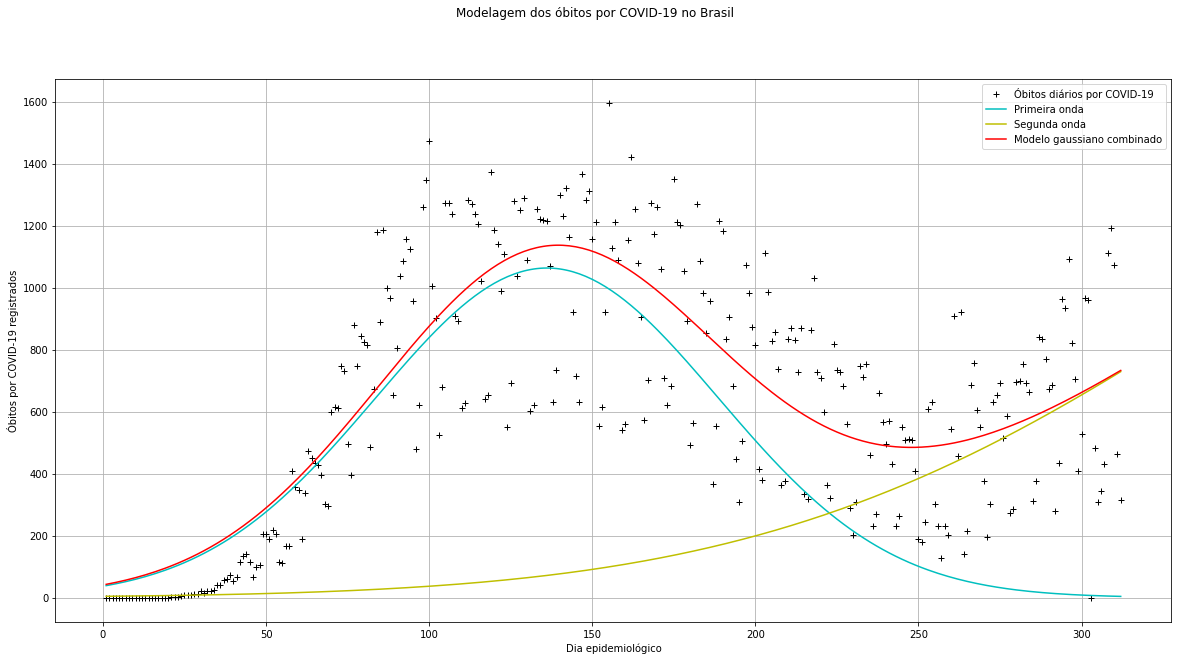

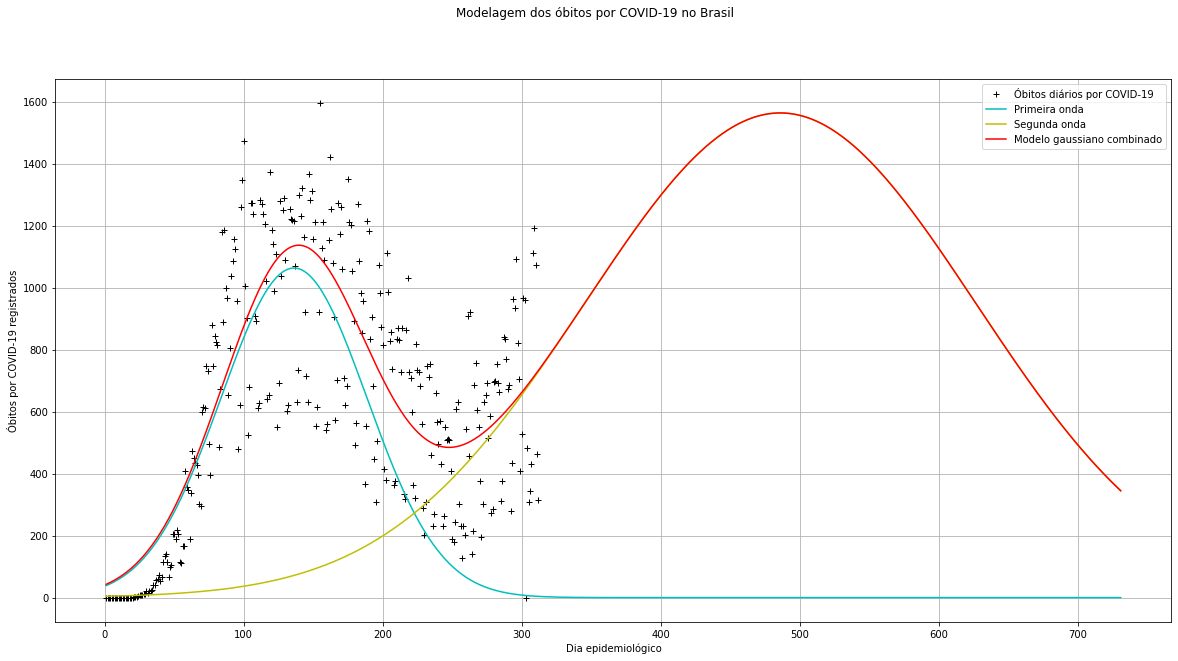

In [439]:
#GRAFICOS (CASOS COVID-19)

plt.figure(figsize=(20,10))
plt.grid(True)
#plt.legend(['Casos COVID-19 registrados'], loc=1)
plt.ylabel('Óbitos por COVID-19 registrados')
plt.xlabel('Dia epidemiológico')
plt.suptitle('Modelagem dos óbitos por COVID-19 no Brasil')

plt.plot(new_dias, casos, 'k+')
plt.plot(new_dias, media[0]*np.exp(-((x_dados-media[1])**2)/(2*(media[2]**2))), 'c')
plt.plot(new_dias, media[3]*np.exp(-((x_dados-media[4])**2)/(2*(media[5]**2))), 'y')
plt.plot(new_dias, media[0]*np.exp(-((x_dados-media[1])**2)/(2*(media[2]**2)))+media[3]*np.exp(-((x_dados-media[4])**2)/(2*(media[5]**2))), 'r')

plt.legend(['Óbitos diários por COVID-19', 'Primeira onda', 'Segunda onda', 'Modelo gaussiano combinado'], loc=1)

plt.show()

#GRAFICOS (CASOS COVID-19)

plt.figure(figsize=(20,10))
plt.grid(True)
#plt.legend(['Casos COVID-19 registrados'], loc=1)
plt.ylabel('Óbitos por COVID-19 registrados')
plt.xlabel('Dia epidemiológico')
plt.suptitle('Modelagem dos óbitos por COVID-19 no Brasil')

future_dias=[]
dia_inicial=1
for i in range(731):
    future_dias.append(dia_inicial)
    dia_inicial+=1

plt.plot(new_dias, casos, 'k+')
plt.plot(future_dias, media[0]*np.exp(-((np.array(future_dias)-media[1])**2)/(2*(media[2]**2))), 'c')
plt.plot(future_dias, media[3]*np.exp(-((np.array(future_dias)-media[4])**2)/(2*(media[5]**2))), 'y')
plt.plot(future_dias, media[0]*np.exp(-((np.array(future_dias)-media[1])**2)/(2*(media[2]**2)))+media[3]*np.exp(-((np.array(future_dias)-media[4])**2)/(2*(media[5]**2))), 'r')

plt.legend(['Óbitos diários por COVID-19', 'Primeira onda', 'Segunda onda', 'Modelo gaussiano combinado'], loc=1)

plt.show()


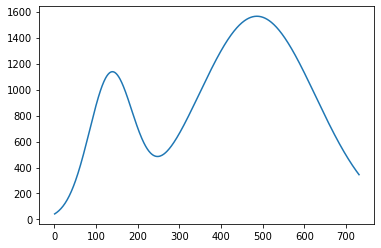

In [440]:
#ARMAZENAR PONTOS PARA FAZER NORMALIZAÇÃO:

gaussianas_backup02 = []  

for i in range(len(future_dias)):
    gaussianas_backup02.append(media[0]*np.exp(-((future_dias[i]-media[1])**2)/(2*(media[2]**2)))+media[3]*np.exp(-((future_dias[i]-media[4])**2)/(2*(media[5]**2))))

plt.plot(future_dias, gaussianas_backup02)
plt.show()


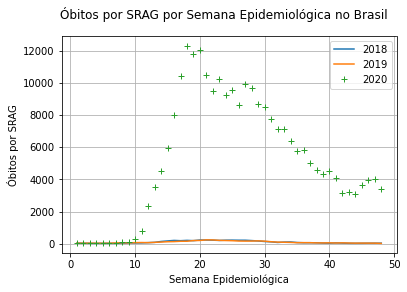

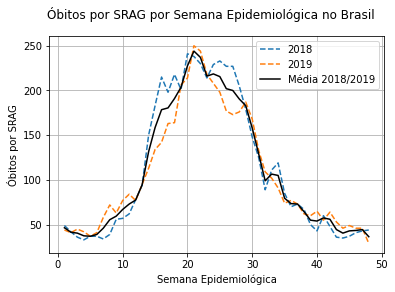

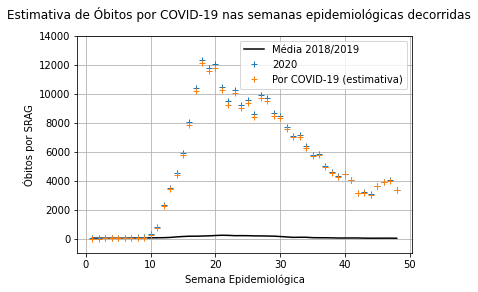

In [441]:
#MORTES POR SRAG

#define labels
colnames = ['semana_epidemiologica', 'ano_2018', 'ano_2019', 'ano_2020']

#import CSV file
data = pandas.read_csv('/content/drive/MyDrive/Colab Notebooks/covid19_second_wave/srag_deaths_brazil.csv', names=colnames, delimiter=';')

#append the data to pyhton lists
semana_epidemiologica = data.semana_epidemiologica.tolist()
casos_2018 = data.ano_2018.tolist()
casos_2019 = data.ano_2019.tolist()
casos_2020 = data.ano_2020.tolist()

#Delete the last row because we dont have the 2020 value to the week number 51
del semana_epidemiologica[-1]
del casos_2018[-1]
del casos_2019[-1]
del casos_2020[-1]
del semana_epidemiologica[-1]
del casos_2018[-1]
del casos_2019[-1]
del casos_2020[-1]
del semana_epidemiologica[-1]
del casos_2018[-1]
del casos_2019[-1]
del casos_2020[-1]
del semana_epidemiologica[-1]
del casos_2018[-1]
del casos_2019[-1]
del casos_2020[-1]

#make some graphs
plt.plot(semana_epidemiologica, casos_2018, '')
plt.plot(semana_epidemiologica, casos_2019, '')
plt.plot(semana_epidemiologica, casos_2020, '+')

plt.grid(True)

plt.legend(['2018', '2019', '2020'], loc=1)
plt.ylabel('Óbitos por SRAG')
plt.xlabel('Semana Epidemiológica')
plt.suptitle('Óbitos por SRAG por Semana Epidemiológica no Brasil')

plt.show()

'''
PARTE 2: Estimar mortes causadas por COVID-19(+problemas advindos da pandemia)
a partir dos dados anteriores:
'''

#Obter uma média anual de casos de mortes por SRAG nas semanas epidemiológicas
#dos anos anteriores:
media_2018_2019 = np.zeros(len(semana_epidemiologica))

for i in range(len(semana_epidemiologica)): 
    media_2018_2019[i] = (casos_2018[i] + casos_2019[i])/2.0
    
#gráfico comparativo de 2018, 2019 e média de 2018/2019:
plt.plot(semana_epidemiologica, casos_2018, '--')
plt.plot(semana_epidemiologica, casos_2019, '--')
plt.plot(semana_epidemiologica, media_2018_2019, 'k')

plt.grid(True)

plt.legend(['2018', '2019', 'Média 2018/2019'], loc=1)
plt.ylabel('Óbitos por SRAG')
plt.xlabel('Semana Epidemiológica')
plt.suptitle('Óbitos por SRAG por Semana Epidemiológica no Brasil')

plt.show()      

#Podemos então estimar o número de casos de mortes por COVID-19 subtraindo a
#média dos casos de 2020:

estimativa_2020 = np.zeros(len(casos_2020))
    
for i in range(len(semana_epidemiologica)): 
    estimativa_2020[i] = casos_2020[i] - media_2018_2019[i]

#gráfico comparativo das mortes por covid e das mortes esperadas por SARG:
plt.plot(semana_epidemiologica, media_2018_2019, 'k')
plt.plot(semana_epidemiologica, casos_2020, '+')
plt.plot(semana_epidemiologica, estimativa_2020, '+')

plt.grid(True)
plt.ylim(-1000, 14000)

plt.legend(['Média 2018/2019', '2020', 'Por COVID-19 (estimativa)'], loc=1)
plt.ylabel('Óbitos por SRAG')
plt.xlabel('Semana Epidemiológica')
plt.suptitle('Estimativa de Óbitos por COVID-19 nas semanas epidemiológicas decorridas')

plt.show()  


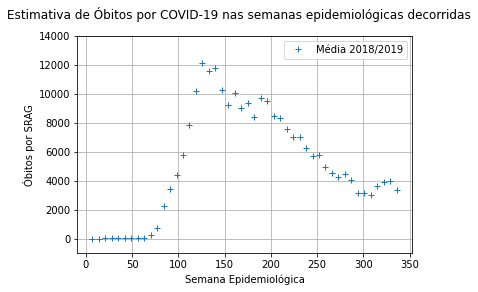

In [442]:

#gráfico comparativo das mortes por covid e das mortes esperadas por SARG:
new_semana_epidemiologica = []
for i in range(len(semana_epidemiologica)):
    new_semana_epidemiologica.append(semana_epidemiologica[i]*7)

plt.plot(new_semana_epidemiologica, estimativa_2020, '+')

plt.grid(True)
plt.ylim(-1000, 14000)

plt.legend(['Média 2018/2019', '2020', 'Por COVID-19 (estimativa)'], loc=1)
plt.ylabel('Óbitos por SRAG')
plt.xlabel('Semana Epidemiológica')
plt.suptitle('Estimativa de Óbitos por COVID-19 nas semanas epidemiológicas decorridas')

plt.show() 


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


Iteração: 50


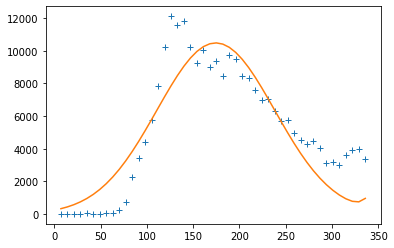

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


Iteração: 100


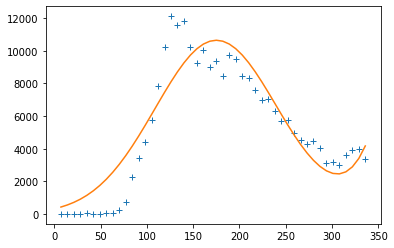

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


Iteração: 150


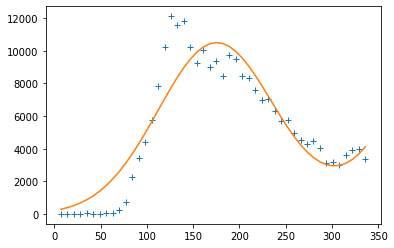

Iteração: 200


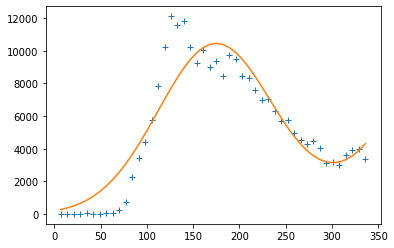

Iteração: 250


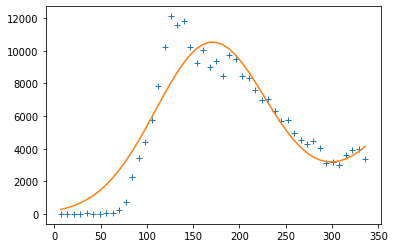

Iteração: 300


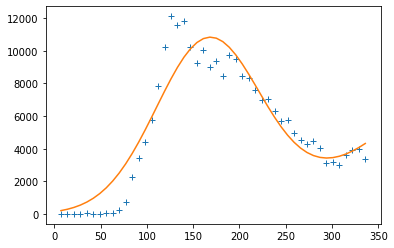

[10460.021218580223, 166.4438865229138, 56.718314616676054, 13757.573236891014, 562.2435618037332, 146.89605546349134]


<Figure size 432x288 with 0 Axes>

In [443]:
#EVOLUÇÃO DIFERENCIAL:

#--- Equações do modelo a ser estudado ---#
def polinomio(x_dados, w):
    return w[0]+w[1]*x_dados+w[2]*x_dados**2+w[3]*x_dados**3+w[4]*x_dados**4+w[5]*x_dados**5

def single_gaussian(x_dados, w):
    return w[0]*np.exp(-(x_dados-w[1])**2/(2*(w[2]**2)))

def double_gaussian(x_dados, w):
    return w[0]*np.exp(-((x_dados-w[1])**2)/(2*(w[2]**2)))+w[3]*np.exp(-((x_dados-w[4])**2)/(2*(w[5]**2)))

#--- Função para plotar ---#
def grafico(x, y, yfit):
    plt.plot(x, y, '+')
    plt.plot(x, yfit)
    plt.show()
    #plt.pause(0.1)
    plt.clf()

#--- Função a ser minimizada pelo método ---# 
def rsme_sin(x_dados, y_dados, w): #rsme para o teste com seno
    y_pred = double_gaussian(x_dados, w)
    return np.sqrt(sum((y_dados-y_pred)**2)/len(y_dados))

#--- Outras Funções ---#

#Função para garantir que novos indivíduos estejam dentro do range estabelecido
def ensure_bounds(vec, bounds):
    vec_new = [] 
    for i in range(len(vec)):
        if vec[i] < bounds[i][0]:
            vec_new.append(bounds[i][0])
        if vec[i] > bounds[i][1]:
            vec_new.append(bounds[i][1])
        if bounds[i][0] <= vec[i] <= bounds[i][1]:
            vec_new.append(vec[i])
    return vec_new

#--- Função DE ---#

def Differential_Evolution(cost_func, bounds, popsize, mutate, recombination, maxiter, x_dados, y_dados):

    #--- Inicializar população ---#
    
    #Cria indivíduos para a população com parâmetros dentro do range estabelecido
    population = []
    for i in range(0,popsize):
        indv = []
        for j in range(len(bounds)):
            indv.append(random.uniform(bounds[j][0],bounds[j][1]))
        population.append(indv)
            
    #--- "Treinar" ---#

    #Para o número de iterações escolhido...:
    for i in range(1, maxiter+1):
        #print ("Iteração:",i)
        gen_scores = []
        #Para todos os indivíduos na população...:
        for j in range(0, popsize):

            #--- Mutação ---#
            
            #Fixa o indivíduo na posição [j] e escolhe outros 3 randomicamente
            candidates = list(range(0,popsize))
            candidates.remove(j)
            random_index = random.sample(candidates, 3)

            x_1 = population[random_index[0]]
            x_2 = population[random_index[1]]
            x_3 = population[random_index[2]]
            x_t = population[j]                #Indivíduo fixado
            
            #Algorítimo de mutação: (mais simples)
            #subtract x_3 from x_2, and create a new vector x_diff
            x_diff = [x_2_i - x_3_i for x_2_i, x_3_i in zip(x_2, x_3)]
            # multiply x_diff by the mutation factor (F) and add to x_1
            v_donor = [x_1_i + mutate * x_diff_i for x_1_i, x_diff_i in zip(x_1, x_diff)]
            v_donor = ensure_bounds(v_donor, bounds)

            #--- "Crossover" ---#

            #Algorítmo que determina se a recombinação acontece ou não, baseado no fator de 
            #recombinação. Se for o caso, gera um novo indivíduo potencialmente melhor que 
            #o fixado [j]
            v_trial = []
            for k in range(len(x_t)):
                crossover = random.random()
                if crossover <= recombination:
                    v_trial.append(v_donor[k])
                else:
                    v_trial.append(x_t[k])
                    
            #--- Seleção ---"

            #Obtem "scores" para o indivíduo fixado e o novo indivíduo
            score_trial  = cost_func(x_dados, y_dados, v_trial)
            score_target = cost_func(x_dados, y_dados, x_t)
            
            #Avalia se o novo é melhor, se sim, substitui o antigo(fixado [j])
            if score_trial < score_target:
                population[j] = v_trial
                gen_scores.append(score_trial)
                #print( '   >',score_trial, v_trial)
            else:
                #print( '   >',score_target, x_t)
                gen_scores.append(score_target)

        #--- Analizar solução/salva-las ---#

        #gen_avg = sum(gen_scores) / popsize #média da geração
        #gen_best = min(gen_scores) #melhor da geração
        gen_sol = population[gen_scores.index(min(gen_scores))] #melhor resultado
        
        #plotar gráfico
        if (i%50.0==0):
            print('Iteração:', i)
            yfit = double_gaussian(x_dados, gen_sol)
            grafico(x_dados, y_dados, yfit)
        
    return gen_sol

#--- Parâmetros do DE ---#

#load data:
x_dados = np.array(new_semana_epidemiologica)
y_dados = np.array(estimativa_2020)

#função a ser minimizada
cost_func = rsme_sin

#range dos parametros do modelo
#leg: w[0]->height of the peak, w[1]->center position, w[2]->standard deviations
bounds = [(0,1e6), (100,175), (0,1000), (0,1e6), (300,600), (0,1000)]

#Outros parâmetros
popsize = 60              #Tamanho da população (Artigo 10*n_parâmetros_do_modelo)
mutate = 0.6              #Fator de mutação [0,2]
recombination = 0.5       #Parâmetro de recombinação [0,1]
maxiter = 300            #Número de gerações

#MAIN:
print(Differential_Evolution(cost_func, bounds, popsize, mutate, recombination, maxiter, x_dados, y_dados))


In [444]:
#VALORES DE 10 RUNS (CASOS COVID-19)

tmp1=[10273.326272862014, 162.08919986231555, 52.23174914136493, 5873.740046013165, 446.8036637158307, 140.4059218081882]
tmp2=[10307.399020972853, 157.93116754493903, 48.99943351175463, 3861.0606120355446, 300.26415763901065, 78.76171389830746]
tmp3=[10607.273042766428, 175.0, 59.98252883456376, 3288.860285553833, 337.9556357925226, 46.76246197260005]
tmp4=[9795.97895680387, 159.6636881676566, 50.54342222202775, 3702.6281009164763, 309.1025326056107, 98.04462339237051]
tmp5=[10635.022258148969, 175.0, 60.256883876948905, 3922.7246502006583, 364.64713471443747, 59.10247990123704]
tmp6=[10125.226676216693, 164.3164656814363, 53.01085764964927, 5466.423540254362, 432.2375186062609, 131.88703552649275]
tmp7=[10501.882335452163, 166.26718156415836, 56.55493572382773, 5358.014395700012, 463.7835314134089, 130.80634356189282]
tmp8=[10140.072845057157, 162.52332918991394, 52.971575292699896, 11187.401296702497, 568.7114514697726, 169.89191598746788]
tmp9=[9930.092604125606, 161.34504135464223, 52.256441595428534, 6848.102467677683, 521.7516982961804, 186.97859512173278]
tmp10=[10654.49319108312, 165.67283582177944, 55.42752435621027, 17622.003239538582, 584.5796035254616, 149.77815037930634]

media=[]

for i in range(len(tmp1)):
    tmp=[tmp1[i], tmp2[i], tmp3[i], tmp4[i], tmp5[i], tmp6[i], tmp7[i], tmp8[i], tmp9[i], tmp10[i]]
    media.append(statistics.mean(tmp))

print(media)


[10297.076720348887, 164.98089091868414, 54.223535220447566, 6713.095863459282, 432.9836927778496, 119.24192415495958]


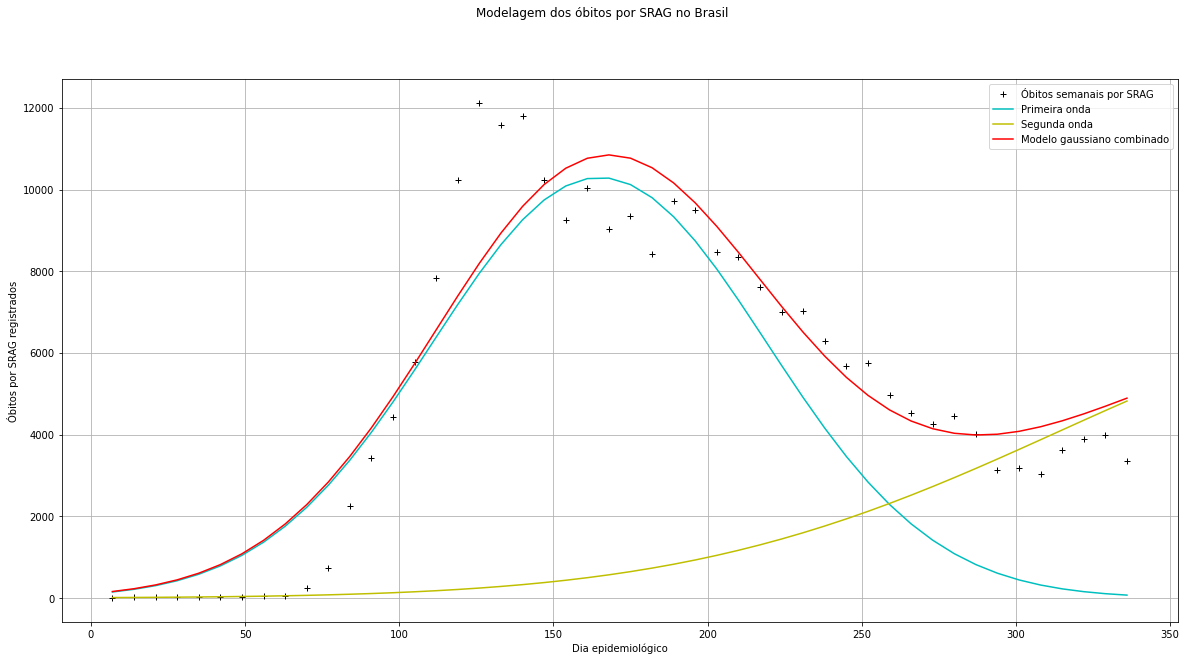

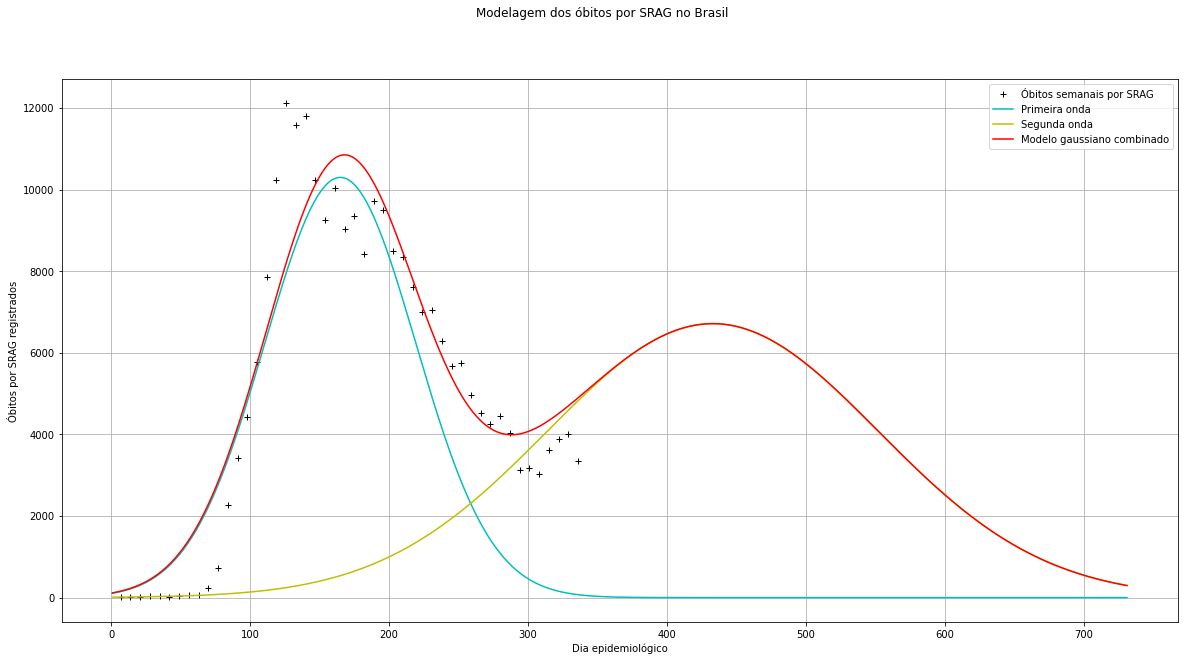

In [446]:
#GRAFICOS (CASOS COVID-19)

plt.figure(figsize=(20,10))
plt.grid(True)
#plt.legend(['Casos COVID-19 registrados'], loc=1)
plt.ylabel('Óbitos por SRAG registrados')
plt.xlabel('Dia epidemiológico')
plt.suptitle('Modelagem dos óbitos por SRAG no Brasil')

plt.plot(new_semana_epidemiologica, estimativa_2020, 'k+')
plt.plot(new_semana_epidemiologica, media[0]*np.exp(-((x_dados-media[1])**2)/(2*(media[2]**2))), 'c')
plt.plot(new_semana_epidemiologica, media[3]*np.exp(-((x_dados-media[4])**2)/(2*(media[5]**2))), 'y')
plt.plot(new_semana_epidemiologica, media[0]*np.exp(-((x_dados-media[1])**2)/(2*(media[2]**2)))+media[3]*np.exp(-((x_dados-media[4])**2)/(2*(media[5]**2))), 'r')

plt.legend(['Óbitos semanais por SRAG', 'Primeira onda', 'Segunda onda', 'Modelo gaussiano combinado'], loc=1)

plt.show()

#GRAFICOS (CASOS COVID-19)

plt.figure(figsize=(20,10))
plt.grid(True)
#plt.legend(['Casos COVID-19 registrados'], loc=1)
plt.ylabel('Óbitos por SRAG registrados')
plt.xlabel('Dia epidemiológico')
plt.suptitle('Modelagem dos óbitos por SRAG no Brasil')

future_dias=[]
dia_inicial=1
for i in range(731):
    future_dias.append(dia_inicial)
    dia_inicial+=1

plt.plot(new_semana_epidemiologica, estimativa_2020, 'k+')
plt.plot(future_dias, media[0]*np.exp(-((np.array(future_dias)-media[1])**2)/(2*(media[2]**2))), 'c')
plt.plot(future_dias, media[3]*np.exp(-((np.array(future_dias)-media[4])**2)/(2*(media[5]**2))), 'y')
plt.plot(future_dias, media[0]*np.exp(-((np.array(future_dias)-media[1])**2)/(2*(media[2]**2)))+media[3]*np.exp(-((np.array(future_dias)-media[4])**2)/(2*(media[5]**2))), 'r')

plt.legend(['Óbitos semanais por SRAG', 'Primeira onda', 'Segunda onda', 'Modelo gaussiano combinado'], loc=1)

plt.show()


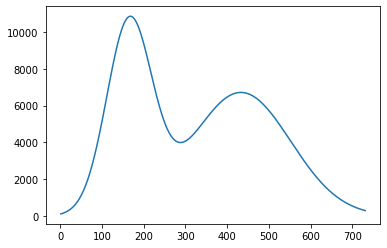

In [447]:

#ARMAZENAR PONTOS PARA FAZER NORMALIZAÇÃO:

gaussianas_backup03 = []  

for i in range(len(future_dias)):
    gaussianas_backup03.append(media[0]*np.exp(-((future_dias[i]-media[1])**2)/(2*(media[2]**2)))+media[3]*np.exp(-((future_dias[i]-media[4])**2)/(2*(media[5]**2))))

plt.plot(future_dias, gaussianas_backup03)
plt.show()


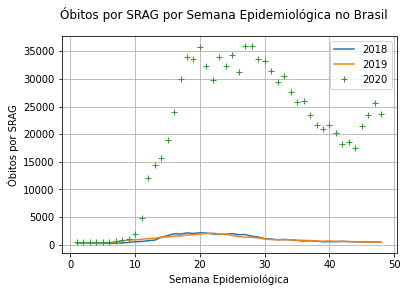

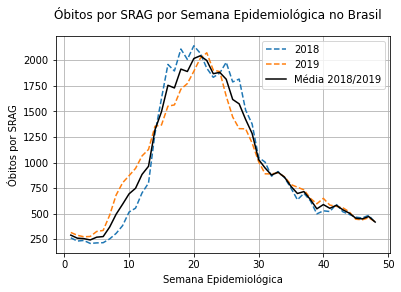

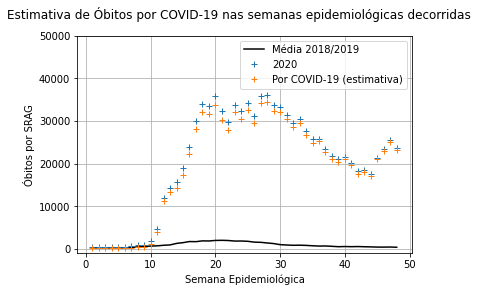

In [448]:
#MORTES POR SRAG

#define labels
colnames = ['semana_epidemiologica', 'ano_2018', 'ano_2019', 'ano_2020']

#import CSV file
data = pandas.read_csv('/content/drive/MyDrive/Colab Notebooks/covid19_second_wave/srag_cases_brazil.csv', names=colnames, delimiter=';')

#append the data to pyhton lists
semana_epidemiologica = data.semana_epidemiologica.tolist()
casos_2018 = data.ano_2018.tolist()
casos_2019 = data.ano_2019.tolist()
casos_2020 = data.ano_2020.tolist()

#Delete the last row because we dont have the 2020 value to the week number 51
del semana_epidemiologica[-1]
del casos_2018[-1]
del casos_2019[-1]
del casos_2020[-1]
del semana_epidemiologica[-1]
del casos_2018[-1]
del casos_2019[-1]
del casos_2020[-1]
del semana_epidemiologica[-1]
del casos_2018[-1]
del casos_2019[-1]
del casos_2020[-1]
del semana_epidemiologica[-1]
del casos_2018[-1]
del casos_2019[-1]
del casos_2020[-1]

#make some graphs
plt.plot(semana_epidemiologica, casos_2018, '')
plt.plot(semana_epidemiologica, casos_2019, '')
plt.plot(semana_epidemiologica, casos_2020, '+')

plt.grid(True)

plt.legend(['2018', '2019', '2020'], loc=1)
plt.ylabel('Óbitos por SRAG')
plt.xlabel('Semana Epidemiológica')
plt.suptitle('Óbitos por SRAG por Semana Epidemiológica no Brasil')

plt.show()

'''
PARTE 2: Estimar mortes causadas por COVID-19(+problemas advindos da pandemia)
a partir dos dados anteriores:
'''

#Obter uma média anual de casos de mortes por SRAG nas semanas epidemiológicas
#dos anos anteriores:
media_2018_2019 = np.zeros(len(semana_epidemiologica))

for i in range(len(semana_epidemiologica)): 
    media_2018_2019[i] = (casos_2018[i] + casos_2019[i])/2.0
    
#gráfico comparativo de 2018, 2019 e média de 2018/2019:
plt.plot(semana_epidemiologica, casos_2018, '--')
plt.plot(semana_epidemiologica, casos_2019, '--')
plt.plot(semana_epidemiologica, media_2018_2019, 'k')

plt.grid(True)

plt.legend(['2018', '2019', 'Média 2018/2019'], loc=1)
plt.ylabel('Óbitos por SRAG')
plt.xlabel('Semana Epidemiológica')
plt.suptitle('Óbitos por SRAG por Semana Epidemiológica no Brasil')

plt.show()      

#Podemos então estimar o número de casos de mortes por COVID-19 subtraindo a
#média dos casos de 2020:

estimativa_2020 = np.zeros(len(casos_2020))
    
for i in range(len(semana_epidemiologica)): 
    estimativa_2020[i] = casos_2020[i] - media_2018_2019[i]

#gráfico comparativo das mortes por covid e das mortes esperadas por SARG:
plt.plot(semana_epidemiologica, media_2018_2019, 'k')
plt.plot(semana_epidemiologica, casos_2020, '+')
plt.plot(semana_epidemiologica, estimativa_2020, '+')

plt.grid(True)
plt.ylim(-1000, 50000)

plt.legend(['Média 2018/2019', '2020', 'Por COVID-19 (estimativa)'], loc=1)
plt.ylabel('Óbitos por SRAG')
plt.xlabel('Semana Epidemiológica')
plt.suptitle('Estimativa de Óbitos por COVID-19 nas semanas epidemiológicas decorridas')

plt.show()  


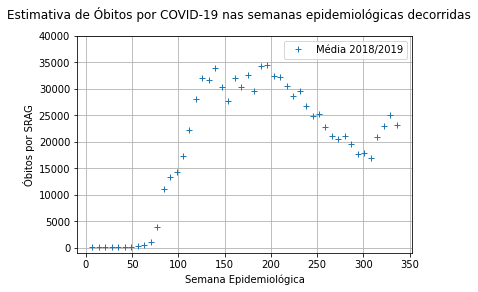

In [449]:

#gráfico comparativo das mortes por covid e das mortes esperadas por SARG:
new_semana_epidemiologica = []
for i in range(len(semana_epidemiologica)):
    new_semana_epidemiologica.append(semana_epidemiologica[i]*7)

plt.plot(new_semana_epidemiologica, estimativa_2020, '+')

plt.grid(True)
plt.ylim(-1000, 40000)

plt.legend(['Média 2018/2019', '2020', 'Por COVID-19 (estimativa)'], loc=1)
plt.ylabel('Óbitos por SRAG')
plt.xlabel('Semana Epidemiológica')
plt.suptitle('Estimativa de Óbitos por COVID-19 nas semanas epidemiológicas decorridas')

plt.show() 


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


Iteração: 50


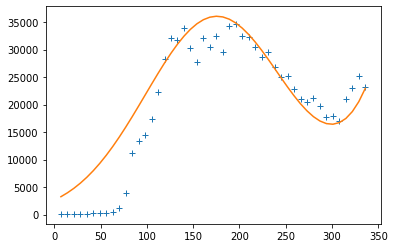

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


Iteração: 100


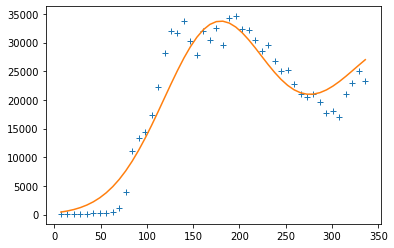

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


Iteração: 150


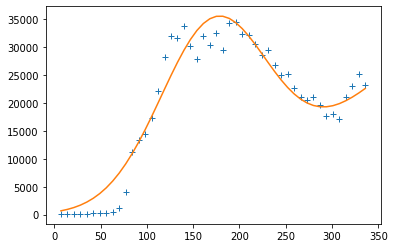

Iteração: 200


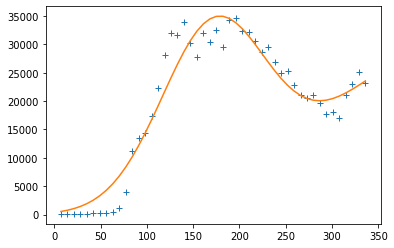

Iteração: 250


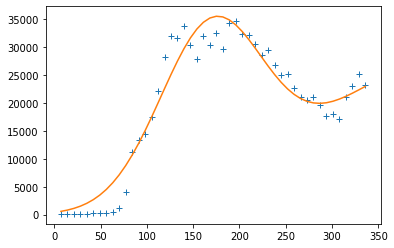

Iteração: 300


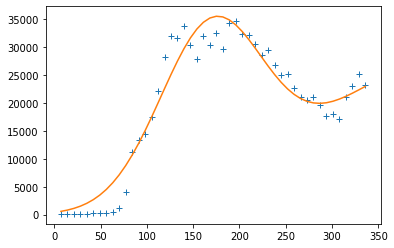

Iteração: 350


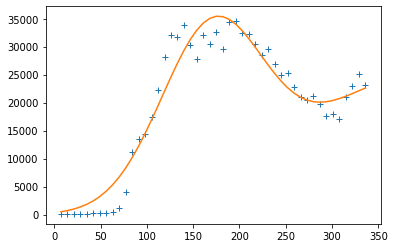

Iteração: 400


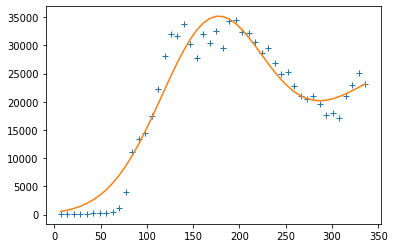

Iteração: 450


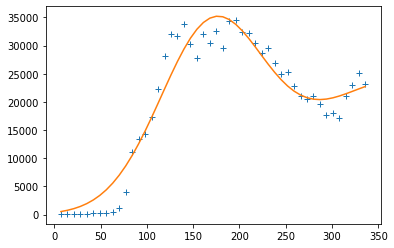

Iteração: 500


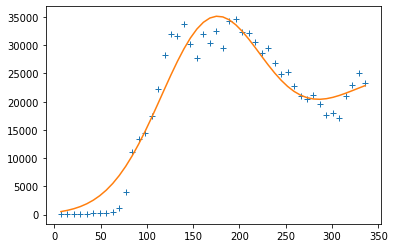

Iteração: 550


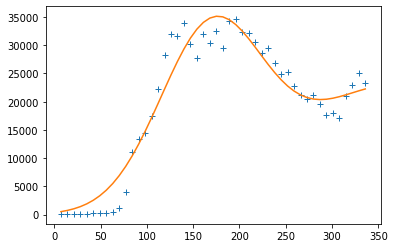

Iteração: 600


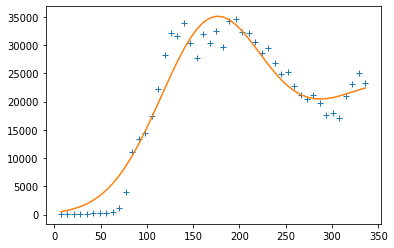

Iteração: 650


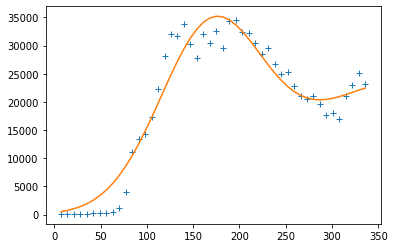

Iteração: 700


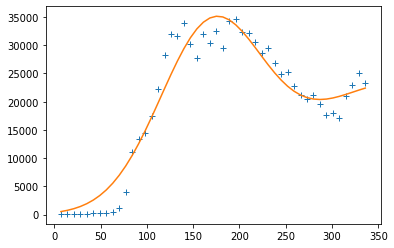

Iteração: 750


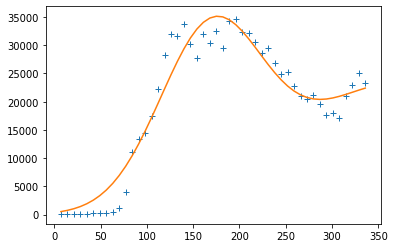

Iteração: 800


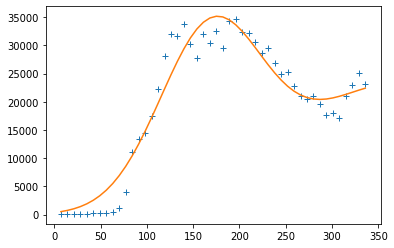

Iteração: 850


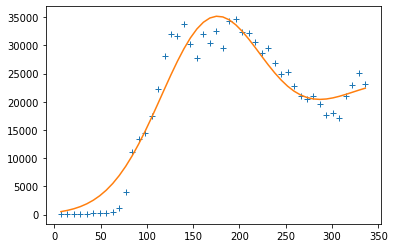

Iteração: 900


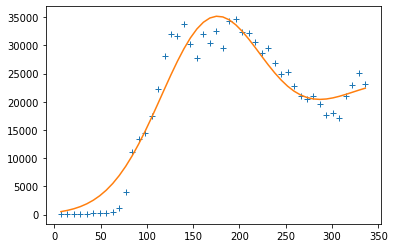

Iteração: 950


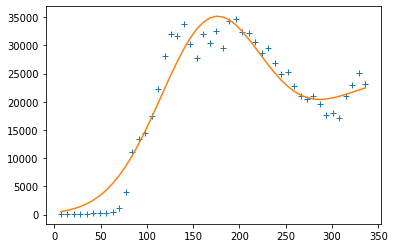

Iteração: 1000


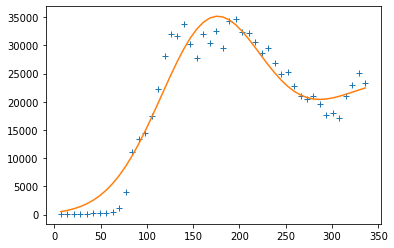

[31009.635476600382, 168.78472685114494, 55.85506112419772, 23304.1696488536, 370.9333628162133, 106.806431304554]


<Figure size 432x288 with 0 Axes>

In [450]:
#EVOLUÇÃO DIFERENCIAL:

#--- Equações do modelo a ser estudado ---#
def polinomio(x_dados, w):
    return w[0]+w[1]*x_dados+w[2]*x_dados**2+w[3]*x_dados**3+w[4]*x_dados**4+w[5]*x_dados**5

def single_gaussian(x_dados, w):
    return w[0]*np.exp(-(x_dados-w[1])**2/(2*(w[2]**2)))

def double_gaussian(x_dados, w):
    return w[0]*np.exp(-((x_dados-w[1])**2)/(2*(w[2]**2)))+w[3]*np.exp(-((x_dados-w[4])**2)/(2*(w[5]**2)))

#--- Função para plotar ---#
def grafico(x, y, yfit):
    plt.plot(x, y, '+')
    plt.plot(x, yfit)
    plt.show()
    #plt.pause(0.1)
    plt.clf()

#--- Função a ser minimizada pelo método ---# 
def rsme_sin(x_dados, y_dados, w): #rsme para o teste com seno
    y_pred = double_gaussian(x_dados, w)
    return np.sqrt(sum((y_dados-y_pred)**2)/len(y_dados))

#--- Outras Funções ---#

#Função para garantir que novos indivíduos estejam dentro do range estabelecido
def ensure_bounds(vec, bounds):
    vec_new = [] 
    for i in range(len(vec)):
        if vec[i] < bounds[i][0]:
            vec_new.append(bounds[i][0])
        if vec[i] > bounds[i][1]:
            vec_new.append(bounds[i][1])
        if bounds[i][0] <= vec[i] <= bounds[i][1]:
            vec_new.append(vec[i])
    return vec_new

#--- Função DE ---#

def Differential_Evolution(cost_func, bounds, popsize, mutate, recombination, maxiter, x_dados, y_dados):

    #--- Inicializar população ---#
    
    #Cria indivíduos para a população com parâmetros dentro do range estabelecido
    population = []
    for i in range(0,popsize):
        indv = []
        for j in range(len(bounds)):
            indv.append(random.uniform(bounds[j][0],bounds[j][1]))
        population.append(indv)
            
    #--- "Treinar" ---#

    #Para o número de iterações escolhido...:
    for i in range(1, maxiter+1):
        #print ("Iteração:",i)
        gen_scores = []
        #Para todos os indivíduos na população...:
        for j in range(0, popsize):

            #--- Mutação ---#
            
            #Fixa o indivíduo na posição [j] e escolhe outros 3 randomicamente
            candidates = list(range(0,popsize))
            candidates.remove(j)
            random_index = random.sample(candidates, 3)

            x_1 = population[random_index[0]]
            x_2 = population[random_index[1]]
            x_3 = population[random_index[2]]
            x_t = population[j]                #Indivíduo fixado
            
            #Algorítimo de mutação: (mais simples)
            #subtract x_3 from x_2, and create a new vector x_diff
            x_diff = [x_2_i - x_3_i for x_2_i, x_3_i in zip(x_2, x_3)]
            # multiply x_diff by the mutation factor (F) and add to x_1
            v_donor = [x_1_i + mutate * x_diff_i for x_1_i, x_diff_i in zip(x_1, x_diff)]
            v_donor = ensure_bounds(v_donor, bounds)

            #--- "Crossover" ---#

            #Algorítmo que determina se a recombinação acontece ou não, baseado no fator de 
            #recombinação. Se for o caso, gera um novo indivíduo potencialmente melhor que 
            #o fixado [j]
            v_trial = []
            for k in range(len(x_t)):
                crossover = random.random()
                if crossover <= recombination:
                    v_trial.append(v_donor[k])
                else:
                    v_trial.append(x_t[k])
                    
            #--- Seleção ---"

            #Obtem "scores" para o indivíduo fixado e o novo indivíduo
            score_trial  = cost_func(x_dados, y_dados, v_trial)
            score_target = cost_func(x_dados, y_dados, x_t)
            
            #Avalia se o novo é melhor, se sim, substitui o antigo(fixado [j])
            if score_trial < score_target:
                population[j] = v_trial
                gen_scores.append(score_trial)
                #print( '   >',score_trial, v_trial)
            else:
                #print( '   >',score_target, x_t)
                gen_scores.append(score_target)

        #--- Analizar solução/salva-las ---#

        #gen_avg = sum(gen_scores) / popsize #média da geração
        #gen_best = min(gen_scores) #melhor da geração
        gen_sol = population[gen_scores.index(min(gen_scores))] #melhor resultado
        
        #plotar gráfico
        if (i%50.0==0):
            print('Iteração:', i)
            yfit = double_gaussian(x_dados, gen_sol)
            grafico(x_dados, y_dados, yfit)
        
    return gen_sol

#--- Parâmetros do DE ---#

#load data:
x_dados = np.array(new_semana_epidemiologica)
y_dados = np.array(estimativa_2020)

#função a ser minimizada
cost_func = rsme_sin

#range dos parametros do modelo
#leg: w[0]->height of the peak, w[1]->center position, w[2]->standard deviations
bounds = [(0,1e6), (100,175), (0,1000), (0,1e6), (300,600), (0,1000)]

#Outros parâmetros
popsize = 60              #Tamanho da população (Artigo 10*n_parâmetros_do_modelo)
mutate = 0.6              #Fator de mutação [0,2]
recombination = 0.5       #Parâmetro de recombinação [0,1]
maxiter = 1000            #Número de gerações

#MAIN:
print(Differential_Evolution(cost_func, bounds, popsize, mutate, recombination, maxiter, x_dados, y_dados))


In [452]:
#VALORES DE 10 RUNS (CASOS COVID-19)

tmp1=[31241.646384479147, 169.2649726277769, 56.161613161813506, 23807.376998785483, 376.17236631436936, 107.29326340759398]
tmp2=[31005.30908754113, 168.76748898998926, 55.83136886262238, 23268.283309669627, 370.4848524493139, 106.6623917246851]
tmp3=[31001.70296681798, 168.74814274139646, 55.83507441190542, 23218.14674825669, 369.9594356142929, 106.46623971932735]
tmp4=[30964.987910370735, 168.68742720931672, 55.81015944253052, 23238.61397203283, 370.08064443513206, 106.74311934314085]
tmp5=[31113.038790827348, 169.15613009836028, 56.10935764400947, 23613.05937864225, 373.98958482197884, 107.2318735824428]

media=[]

for i in range(len(tmp1)):
    tmp=[tmp1[i], tmp2[i], tmp3[i], tmp4[i], tmp5[i]]
    media.append(statistics.mean(tmp))

print(media)


[31065.337028007267, 168.92483233336793, 55.94951470457626, 23429.096081477375, 372.1373767270174, 106.87937755543801]


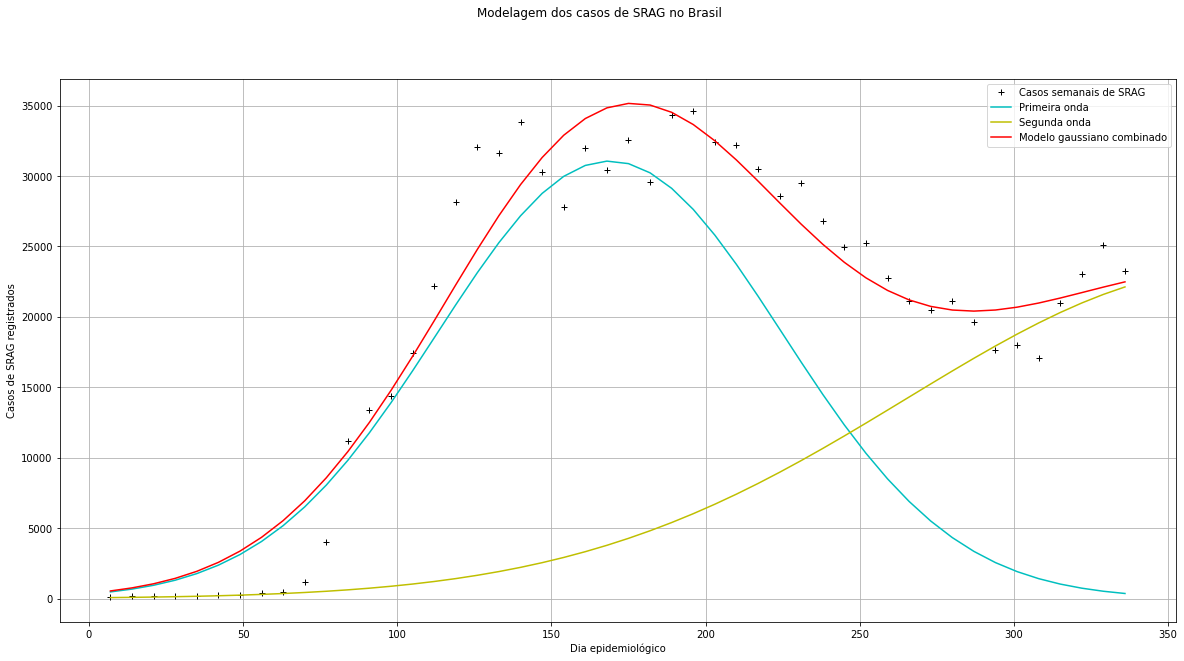

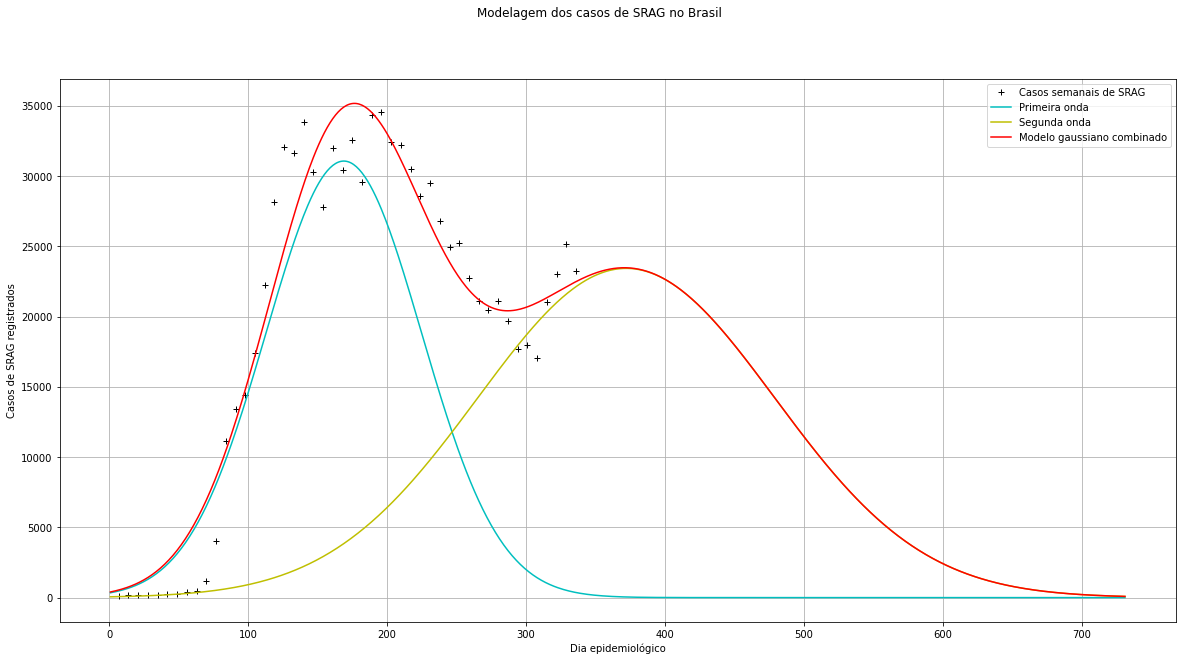

In [453]:
#GRAFICOS (CASOS COVID-19)

plt.figure(figsize=(20,10))
plt.grid(True)
#plt.legend(['Casos COVID-19 registrados'], loc=1)
plt.ylabel('Casos de SRAG registrados')
plt.xlabel('Dia epidemiológico')
plt.suptitle('Modelagem dos casos de SRAG no Brasil')

plt.plot(new_semana_epidemiologica, estimativa_2020, 'k+')
plt.plot(new_semana_epidemiologica, media[0]*np.exp(-((x_dados-media[1])**2)/(2*(media[2]**2))), 'c')
plt.plot(new_semana_epidemiologica, media[3]*np.exp(-((x_dados-media[4])**2)/(2*(media[5]**2))), 'y')
plt.plot(new_semana_epidemiologica, media[0]*np.exp(-((x_dados-media[1])**2)/(2*(media[2]**2)))+media[3]*np.exp(-((x_dados-media[4])**2)/(2*(media[5]**2))), 'r')

plt.legend(['Casos semanais de SRAG', 'Primeira onda', 'Segunda onda', 'Modelo gaussiano combinado'], loc=1)

plt.show()

#GRAFICOS (CASOS COVID-19)

plt.figure(figsize=(20,10))
plt.grid(True)
#plt.legend(['Casos COVID-19 registrados'], loc=1)
plt.ylabel('Casos de SRAG registrados')
plt.xlabel('Dia epidemiológico')
plt.suptitle('Modelagem dos casos de SRAG no Brasil')

future_dias=[]
dia_inicial=1
for i in range(731):
    future_dias.append(dia_inicial)
    dia_inicial+=1

plt.plot(new_semana_epidemiologica, estimativa_2020, 'k+')
plt.plot(future_dias, media[0]*np.exp(-((np.array(future_dias)-media[1])**2)/(2*(media[2]**2))), 'c')
plt.plot(future_dias, media[3]*np.exp(-((np.array(future_dias)-media[4])**2)/(2*(media[5]**2))), 'y')
plt.plot(future_dias, media[0]*np.exp(-((np.array(future_dias)-media[1])**2)/(2*(media[2]**2)))+media[3]*np.exp(-((np.array(future_dias)-media[4])**2)/(2*(media[5]**2))), 'r')

plt.legend(['Casos semanais de SRAG', 'Primeira onda', 'Segunda onda', 'Modelo gaussiano combinado'], loc=1)

plt.show()


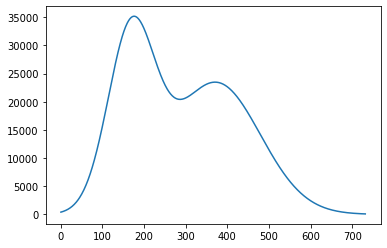

In [454]:

#ARMAZENAR PONTOS PARA FAZER NORMALIZAÇÃO:

gaussianas_backup04 = []  

for i in range(len(future_dias)):
    gaussianas_backup04.append(media[0]*np.exp(-((future_dias[i]-media[1])**2)/(2*(media[2]**2)))+media[3]*np.exp(-((future_dias[i]-media[4])**2)/(2*(media[5]**2))))

plt.plot(future_dias, gaussianas_backup04)
plt.show()


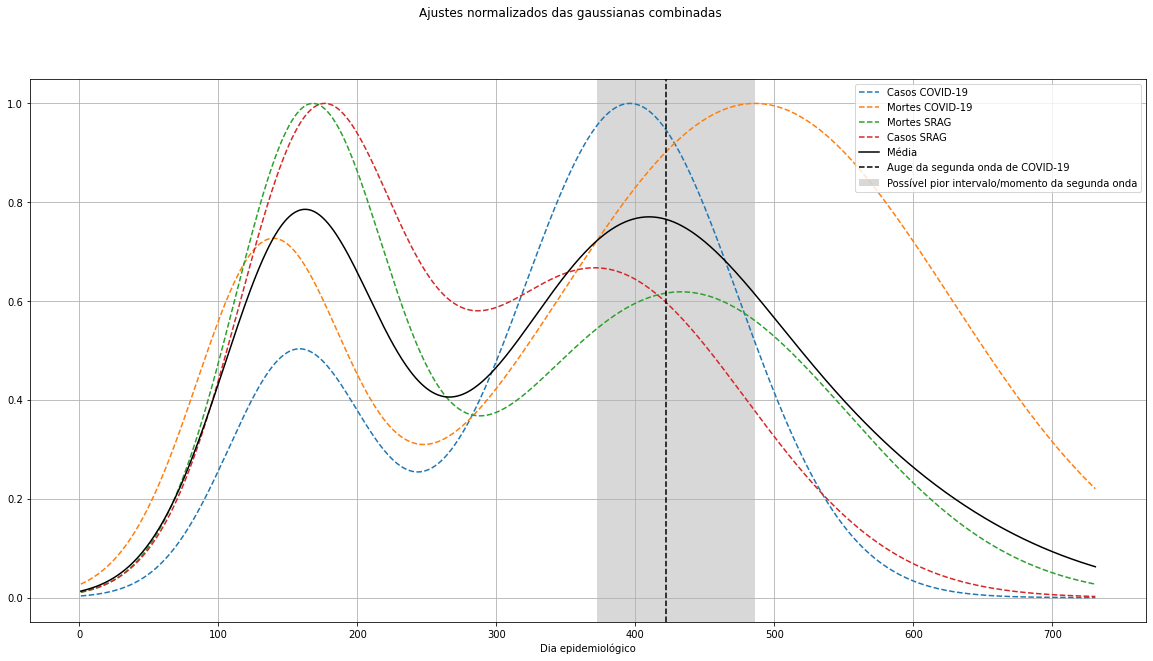

In [478]:
#GRÁFICO NORMALIZADO PELOS MÁXIMOS DE CADA CURVA

plt.figure(figsize=(20,10))
plt.grid(True)

plt.xlabel('Dia epidemiológico')
plt.suptitle('Ajustes normalizados das gaussianas combinadas')

plt.plot(future_dias, gaussianas_backup01/max(gaussianas_backup01), '--')
plt.plot(future_dias, gaussianas_backup02/max(gaussianas_backup02), '--')
plt.plot(future_dias, gaussianas_backup03/max(gaussianas_backup03), '--')
plt.plot(future_dias, gaussianas_backup04/max(gaussianas_backup04), '--')
plt.plot(future_dias, (gaussianas_backup01/max(gaussianas_backup01)+gaussianas_backup02/max(gaussianas_backup02)+gaussianas_backup03/max(gaussianas_backup03)+gaussianas_backup04/max(gaussianas_backup04))/4.0, 'k')

plt.axvline(x=(396.0701234464286+486.0259732016483+432.9836927778496+372.1373767270174)/4.0, color='k', linestyle='--')

plt.axvspan(372.1373767270174, 486.0259732016483, facecolor='0.7', alpha=0.5)

plt.legend(['Casos COVID-19', 'Mortes COVID-19', 'Mortes SRAG', 'Casos SRAG', 'Média', 'Auge da segunda onda de COVID-19', 'Possível pior intervalo/momento da segunda onda'], loc=1)

plt.show()
